**Forecasting BTC-USD Realized Volatility**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install arch

Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/


In [5]:
!pip3 install yfinance

Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/


In [6]:
import yfinance as yf

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error as mse, r2_score 
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Ref: https://towardsdatascience.com/8-commonly-used-pandas-display-options-you-should-know-a832365efa95
# ADJUST COLUMN WIDTH IN PANDAS TO SHOW ALL TEXT
# (FOR RESULT DISPLAY LATER)

pd.set_option('display.max_colwidth', None)

In [10]:
start = datetime(2018, 1, 1)
end = datetime(2023, 1, 1)

tckr = 'BTC-USD'

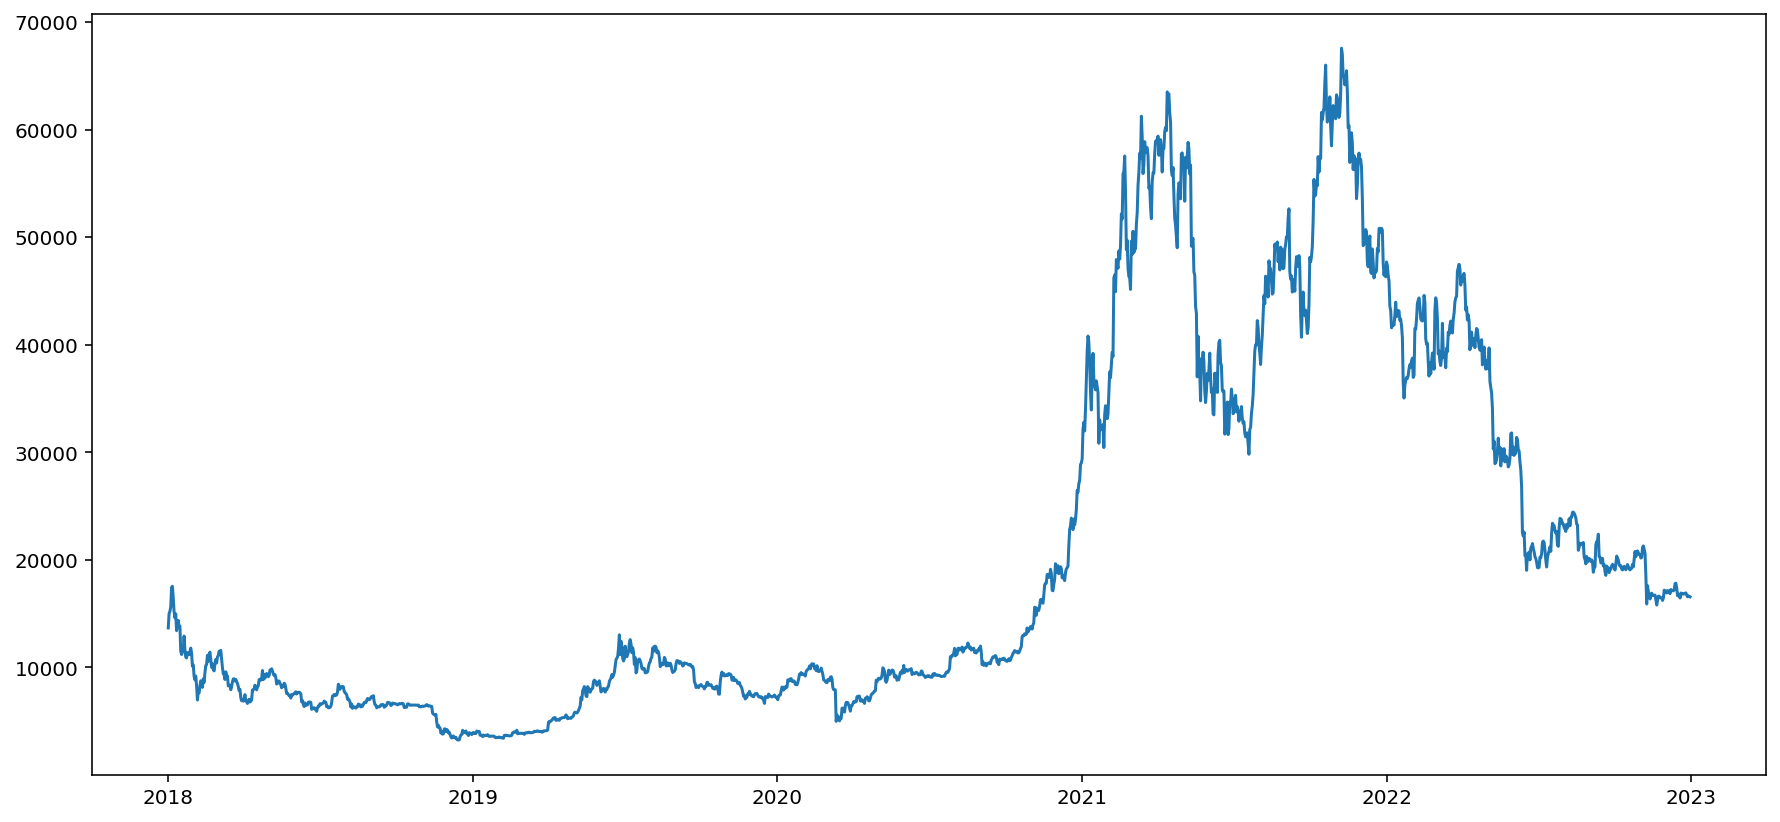

In [11]:
ticker = yf.Ticker(tckr)
df = ticker.history(start=start, 
                    end=end, 
                    interval="1d")

plt.figure(figsize=(15,7))
plt.plot(df.Close);

In [12]:
# CALCULATE PRICE RETURNS AS DAILY PERCENTAGE CHANGE USING pct_change()
df['returns'] = 100 * df.Close.pct_change().dropna()

In [13]:
# CALCULATE LOG RETURNS BASED ON ABOVE FORMULA
df['log_returns'] = np.log(df.Close/df.Close.shift(1))

In [14]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,log_returns
Date,,,,,,,,,
2022-12-27 00:00:00+00:00,16919.291016,16959.845703,16642.072266,16717.173828,15748580239,0.0,0.0,-1.197596,-0.012048
2022-12-28 00:00:00+00:00,16716.400391,16768.169922,16497.556641,16552.572266,17005713920,0.0,0.0,-0.984626,-0.009895
2022-12-29 00:00:00+00:00,16552.322266,16651.755859,16508.683594,16642.341797,14472237479,0.0,0.0,0.542330,0.005409
2022-12-30 00:00:00+00:00,16641.330078,16643.427734,16408.474609,16602.585938,15929162910,0.0,0.0,-0.238884,-0.002392
2022-12-31 00:00:00+00:00,16603.673828,16628.986328,16517.519531,16547.496094,11239186456,0.0,0.0,-0.331815,-0.003324


In [15]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,log_returns
Date,,,,,,,,,
2018-01-01 00:00:00+00:00,14112.200195,14112.200195,13154.700195,13657.200195,10291200000,0.0,0.0,NaN,NaN
2018-01-02 00:00:00+00:00,13625.000000,15444.599609,13163.599609,14982.099609,16846600192,0.0,0.0,9.701106,0.092589
2018-01-03 00:00:00+00:00,14978.200195,15572.799805,14844.500000,15201.000000,16871900160,0.0,0.0,1.461080,0.014505
2018-01-04 00:00:00+00:00,15270.700195,15739.700195,14522.200195,15599.200195,21783199744,0.0,0.0,2.619566,0.025858
2018-01-05 00:00:00+00:00,15477.200195,17705.199219,15202.799805,17429.500000,23840899072,0.0,0.0,11.733293,0.110945


In [16]:
# DROPPING THE 1ST ROW OF DATA 
# BECAUSE I SHIFTED IT FORWARD TO CALCULATE RETURNS/LOG RETURNS
df.dropna(inplace=True)

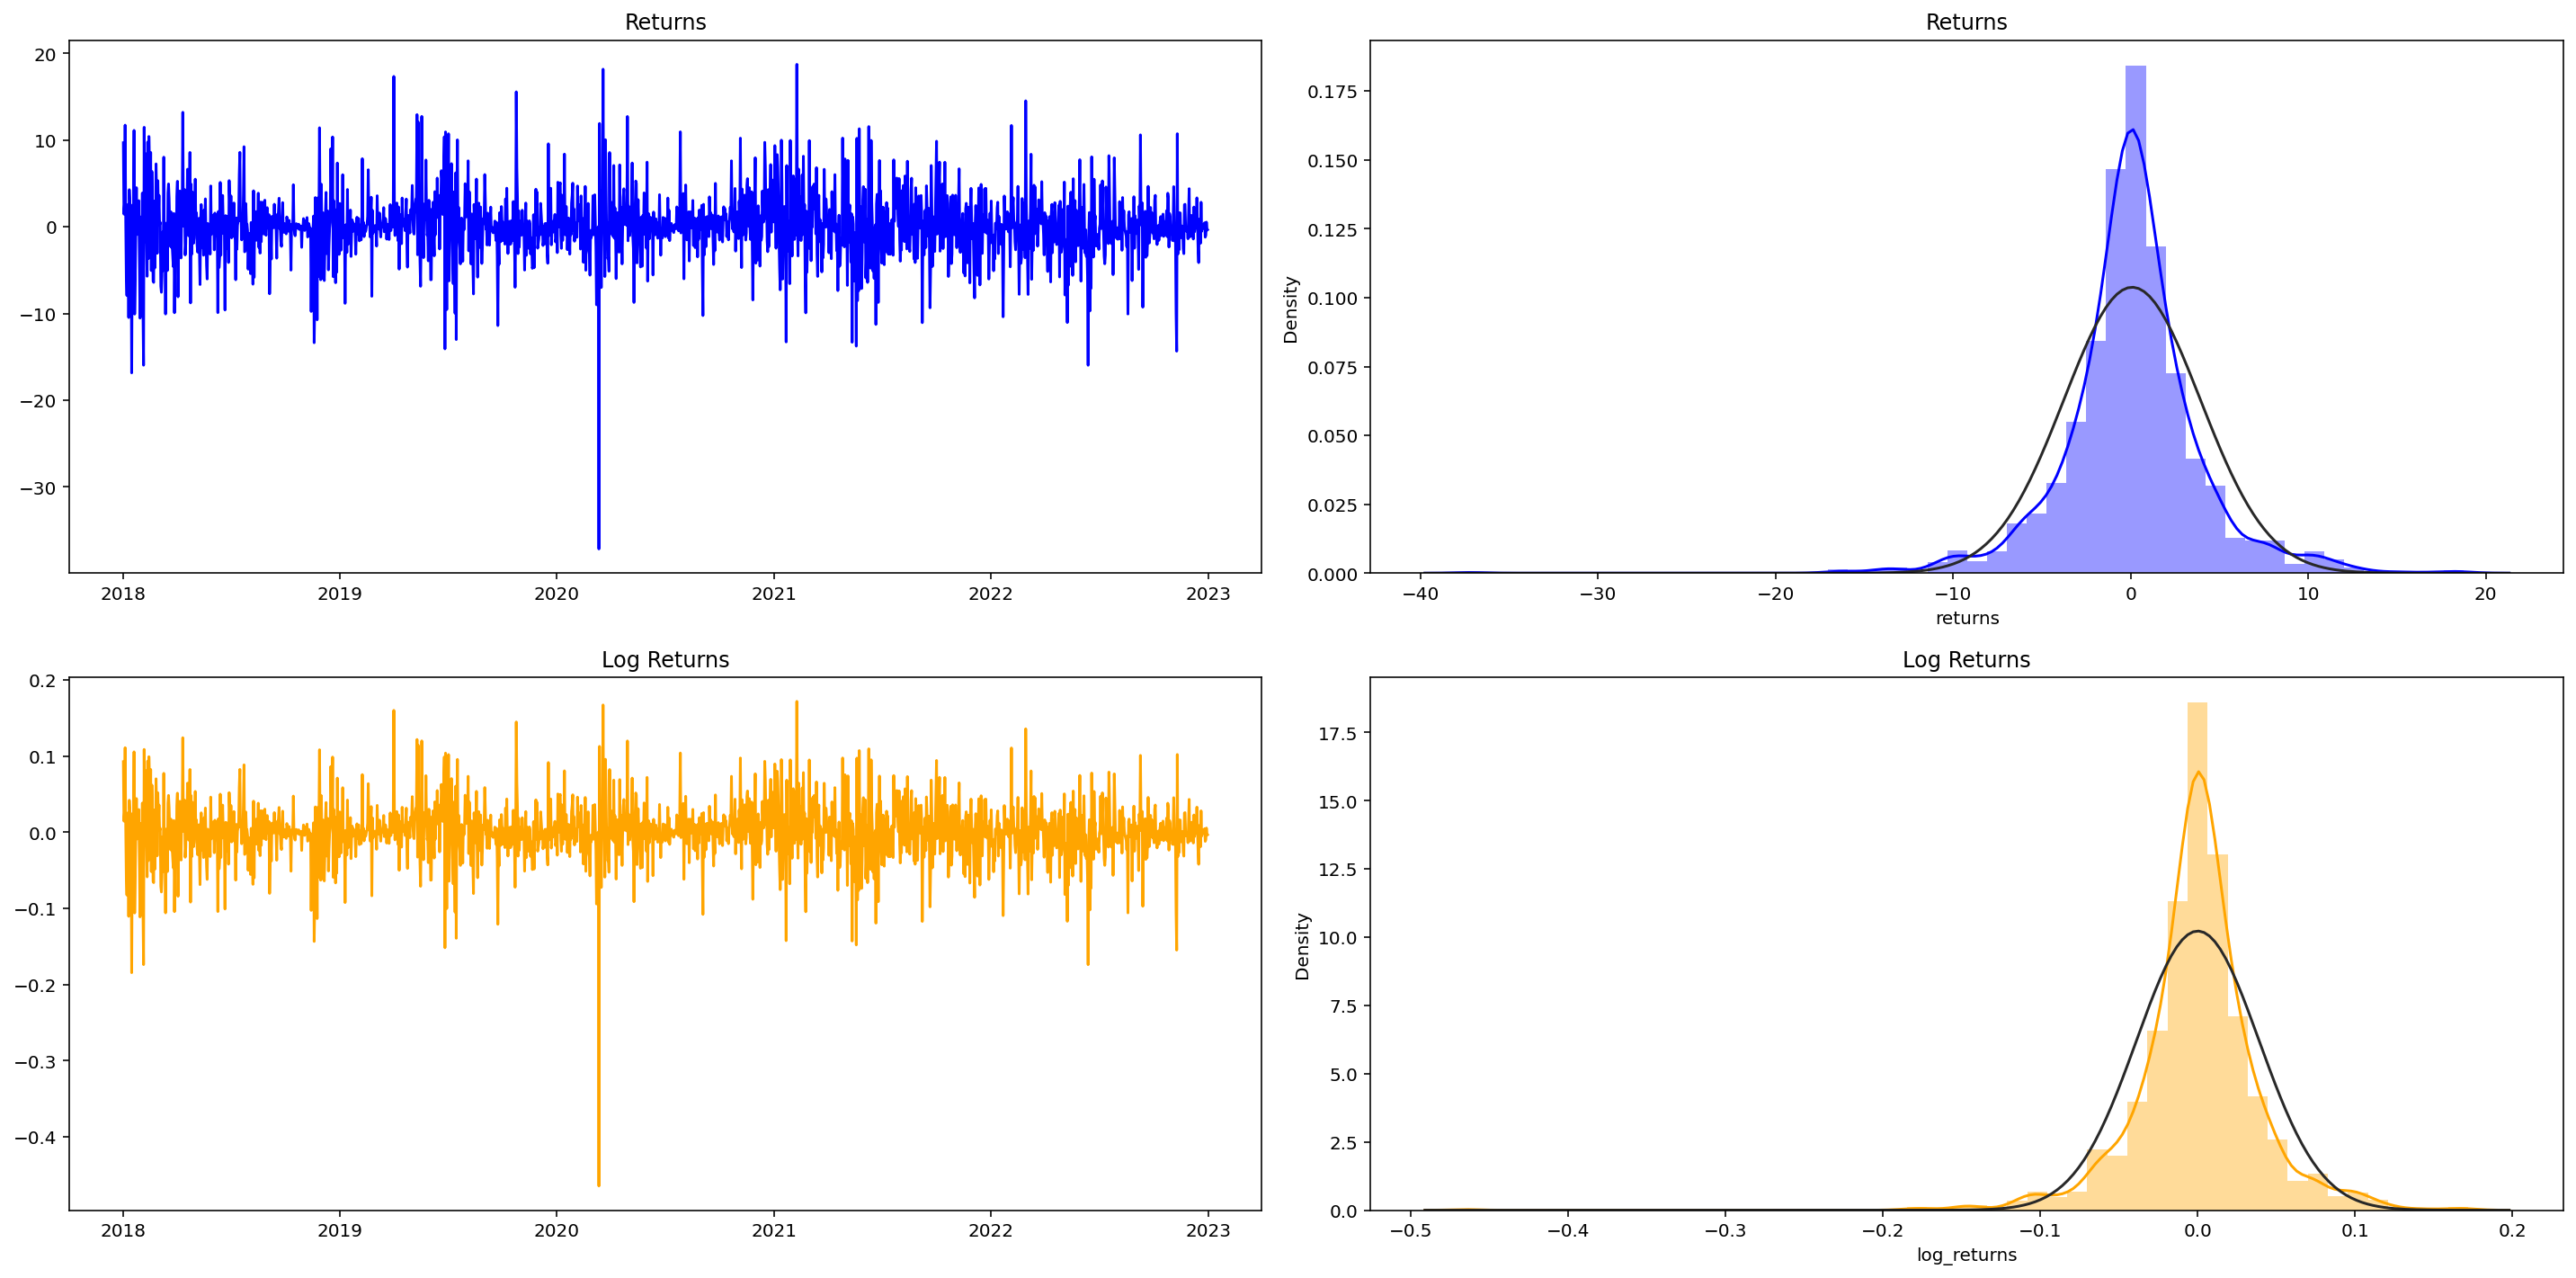

In [17]:
# PLOT DISTRIBUTION PLOTS OF RETURNS & LOG RETURNS
# AND VISUALLY COMPARE THEM WITH THE STANDARD NORMAL DISTRIBUTION
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

axes[0][0].plot(df.returns, color='blue')
axes[0][0].set_title('Returns')

sns.distplot(df.returns, norm_hist=True, fit=stats.norm, color='blue',
             bins=50, ax=axes[0][1])
axes[0][1].set_title('Returns')

axes[1][0].plot(df.log_returns, color='orange')
axes[1][0].set_title('Log Returns')

sns.distplot(df.log_returns, norm_hist=True, fit=stats.norm, color='orange',
             bins=50, ax=axes[1][1])
axes[1][1].set_title('Log Returns')
plt.tight_layout()
fig.show();

In [18]:
df.returns.describe()

count    1825.000000
mean        0.085737
std         3.845475
min       -37.169539
25%        -1.557212
50%         0.097635
75%         1.733270
max        18.746474
Name: returns, dtype: float64

In [19]:
df.log_returns.describe()

count    1825.000000
mean        0.000105
std         0.039029
min        -0.464730
25%        -0.015695
50%         0.000976
75%         0.017184
max         0.171821
Name: log_returns, dtype: float64

In [20]:
# CREATE A FUNCTION THAT CALCULATE REALIZED VOLATILITY
# FROM SAILY LOG RETURNS
def realized_volatility_daily(series_log_return):
    """
    Get the daily realized volatility which is calculated as the square root
    of sum of squares of log returns within a specific window interval 
    """
    return np.sqrt(np.sum(series_log_return**2)/(WINDOW_SIZE-1))

In [21]:
WINDOW_SIZE = 30
n_future = 7

In [22]:
# GET BACKWARD LOOKING REALIZED VOLATILITY
df['vol_current'] = df.log_returns.rolling(window=WINDOW_SIZE)\
                                   .apply(realized_volatility_daily)

# GET FORWARD LOOKING REALIZED VOLATILITY 
df['vol_future'] = df.log_returns.shift(-n_future)\
                                 .rolling(window=WINDOW_SIZE)\
                                 .apply(realized_volatility_daily)

In [23]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,log_returns,vol_current,vol_future
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.0,1825.0,1825.000000,1825.000000,1796.000000,1789.000000
mean,20343.091860,20843.071602,19776.144220,20342.329657,2.660972e+10,0.0,0.0,0.085737,0.000105,0.036652,0.036520
std,16995.024328,17439.152749,16479.430250,16989.952492,1.982622e+10,0.0,0.0,3.845475,0.039029,0.014709,0.014584
min,3236.274658,3275.377930,3191.303467,3236.761719,2.923670e+09,0.0,0.0,-37.169539,-0.464730,0.011177,0.011177
25%,7685.140137,7901.849121,7515.849609,7680.066406,1.275080e+10,0.0,0.0,-1.557212,-0.015695,0.027707,0.027690
50%,10960.735352,11298.221680,10649.495117,10951.000000,2.432435e+10,0.0,0.0,0.097635,0.000976,0.034153,0.034110
75%,33811.242188,34802.742188,32270.175781,33746.003906,3.580788e+10,0.0,0.0,1.733270,0.017184,0.043320,0.043273
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0,18.746474,0.171821,0.103878,0.103878


**Stationarity Checking**

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
# LOG RETURNS
adfuller_results = adfuller(df.log_returns.dropna())

print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value: {adfuller_results[1]}')
print('Critical Values:')
for key, value in adfuller_results[4].items():
    print(f'{key}: {value:.4f}')

ADF Statistic: -29.672636913842208
p-value: 0.0
Critical Values:
1%: -3.4339
5%: -2.8631
10%: -2.5676


In [26]:
# RETURNS
adfuller_results = adfuller(df.returns.dropna())

print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value: {adfuller_results[1]}')
print('Critical Values:')
for key, value in adfuller_results[4].items():
    print(f'{key}: {value:.4f}')

ADF Statistic: -29.760830959662172
p-value: 0.0
Critical Values:
1%: -3.4339
5%: -2.8631
10%: -2.5676


In [27]:
# CURRENT REALIZED VOLATILITY
adfuller_results = adfuller(df.vol_current.dropna())

print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value: {adfuller_results[1]}')
print('Critical Values:')
for key, value in adfuller_results[4].items():
    print(f'{key}: {value:.4f}')

ADF Statistic: -5.4592657295612455
p-value: 2.540193924649362e-06
Critical Values:
1%: -3.4340
5%: -2.8632
10%: -2.5676


Using a significant level alpha of 0.05, p-value is significantly smaller than alpha, which means there's enough evidence to reject the Null Hypothesis.

Hence, Returns, Log returns, and Current Volatility are all not dependent on time/trend

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2018-01-02 00:00:00+00:00 to 2022-12-31 00:00:00+00:00
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1825 non-null   float64
 1   High          1825 non-null   float64
 2   Low           1825 non-null   float64
 3   Close         1825 non-null   float64
 4   Volume        1825 non-null   int64  
 5   Dividends     1825 non-null   float64
 6   Stock Splits  1825 non-null   float64
 7   returns       1825 non-null   float64
 8   log_returns   1825 non-null   float64
 9   vol_current   1796 non-null   float64
 10  vol_future    1789 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 171.1 KB


In [29]:
df.head(40)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,log_returns,vol_current,vol_future
Date,,,,,,,,,,,
2018-01-02 00:00:00+00:00,13625.000000,15444.599609,13163.599609,14982.099609,16846600192,0.0,0.0,9.701106,0.092589,NaN,NaN
2018-01-03 00:00:00+00:00,14978.200195,15572.799805,14844.500000,15201.000000,16871900160,0.0,0.0,1.461080,0.014505,NaN,NaN
2018-01-04 00:00:00+00:00,15270.700195,15739.700195,14522.200195,15599.200195,21783199744,0.0,0.0,2.619566,0.025858,NaN,NaN
2018-01-05 00:00:00+00:00,15477.200195,17705.199219,15202.799805,17429.500000,23840899072,0.0,0.0,11.733293,0.110945,NaN,NaN
2018-01-06 00:00:00+00:00,17462.099609,17712.400391,16764.599609,17527.000000,18314600448,0.0,0.0,0.559396,0.005578,NaN,NaN
2018-01-07 00:00:00+00:00,17527.300781,17579.599609,16087.700195,16477.599609,15866000384,0.0,0.0,-5.987336,-0.061741,NaN,NaN
2018-01-08 00:00:00+00:00,16476.199219,16537.900391,14208.200195,15170.099609,18413899776,0.0,0.0,-7.935015,-0.082675,NaN,NaN
2018-01-09 00:00:00+00:00,15123.700195,15497.500000,14424.000000,14595.400391,16659999744,0.0,0.0,-3.788368,-0.038620,NaN,NaN
2018-01-10 00:00:00+00:00,14588.500000,14973.299805,13691.200195,14973.299805,18500800512,0.0,0.0,2.589168,0.025562,NaN,NaN


Since I am currently using a WINDOW_SIZE of 30 and a horizon n_future of 7, the volatilty of first 29 values as well as the last 7 values of the dataframe would be NaN, and therefore need to be dropped from the dataset.

In [30]:
# DROPPING ALL NaN VALUES
df.dropna(inplace=True)

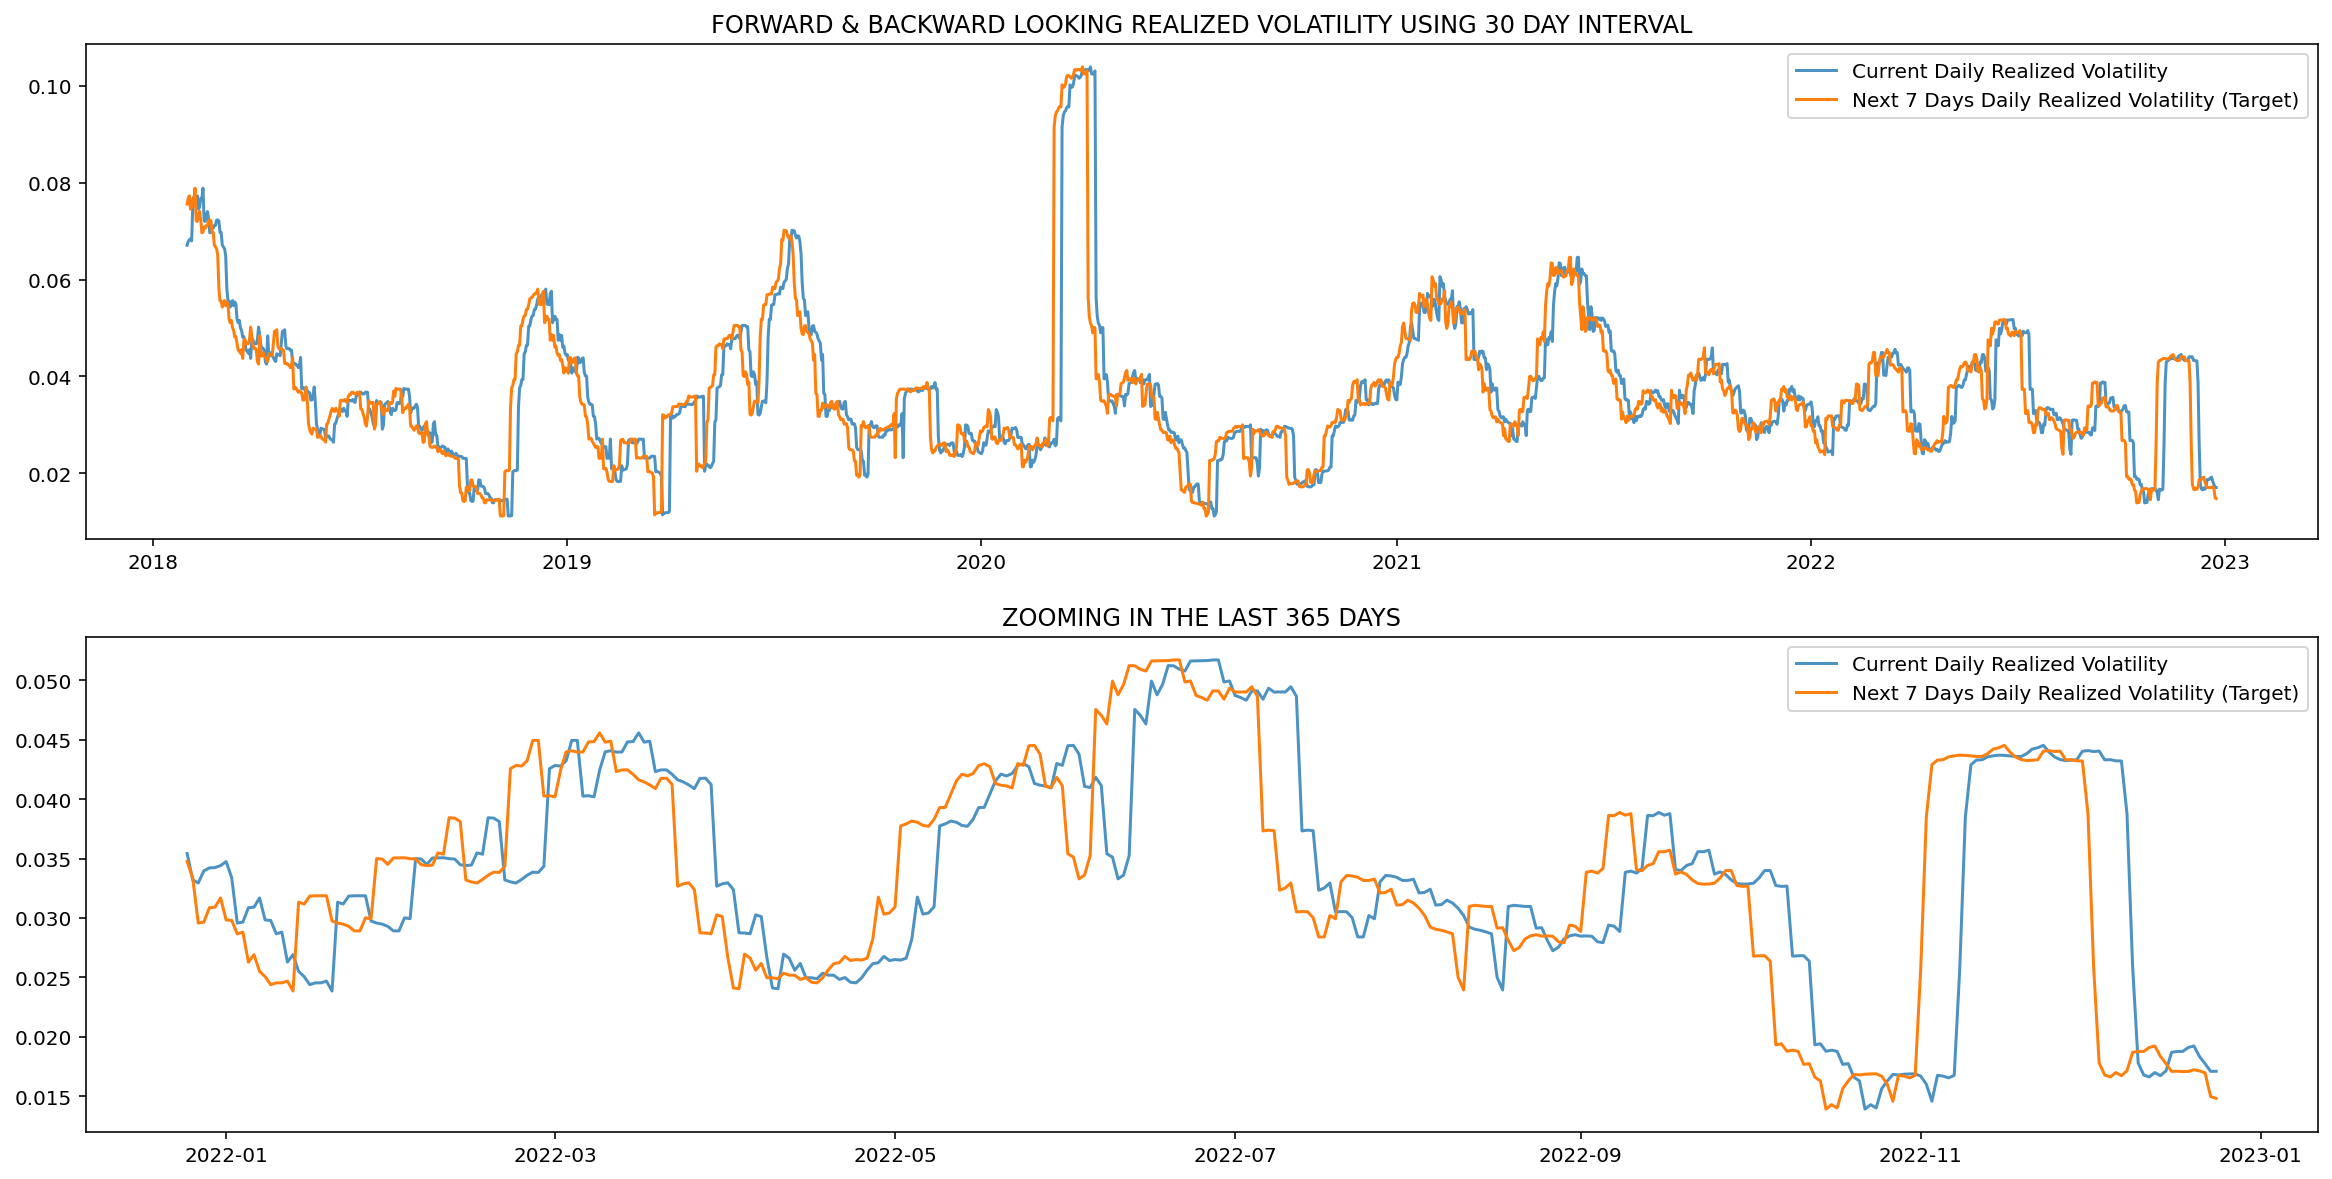

In [31]:
# VISUALIZE REALIZED CURRENT VS. FUTURE VOLATILITY
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,10))

# ax1.plot(df.log_returns, color='gray', alpha=.4, label='Log Returns')
ax1.plot(df.vol_current, alpha=.8, label='Current Daily Realized Volatility')
ax1.plot(df.vol_future, label=f'Next {n_future} Days Daily Realized Volatility (Target)')

# ax2.plot(df.log_returns[-365:], color='gray', alpha=.4, label='Log Returns')
ax2.plot(df.vol_current[-365:], alpha=.8, label='Current Daily Realized Volatility')
ax2.plot(df.vol_future[-365:], label=f'Next {n_future} Days Daily Realized Volatility (Target)')

ax1.title.set_text(f'FORWARD & BACKWARD LOOKING REALIZED VOLATILITY USING {WINDOW_SIZE} DAY INTERVAL')
ax2.title.set_text('ZOOMING IN THE LAST 365 DAYS')

ax1.legend()
ax2.legend()
plt.show();
     

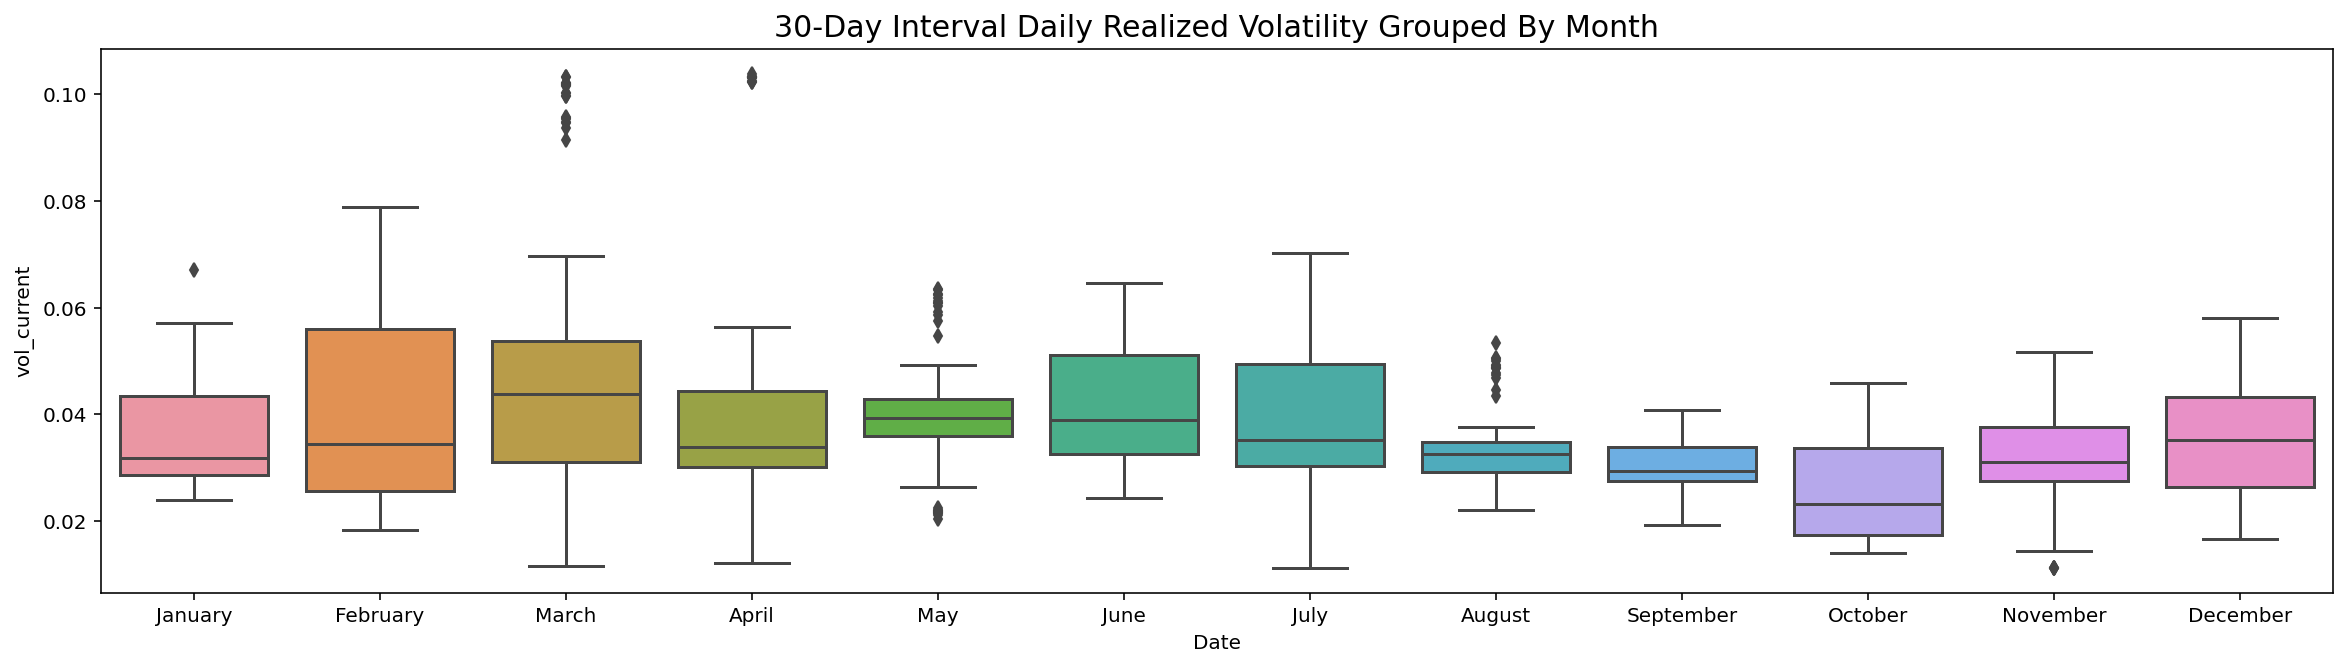

In [32]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=df.index.month_name(), y=df.vol_current, ax=ax)
ax.set_title(f'{WINDOW_SIZE}-Day Interval Daily Realized Volatility Grouped By Month', fontsize=15);

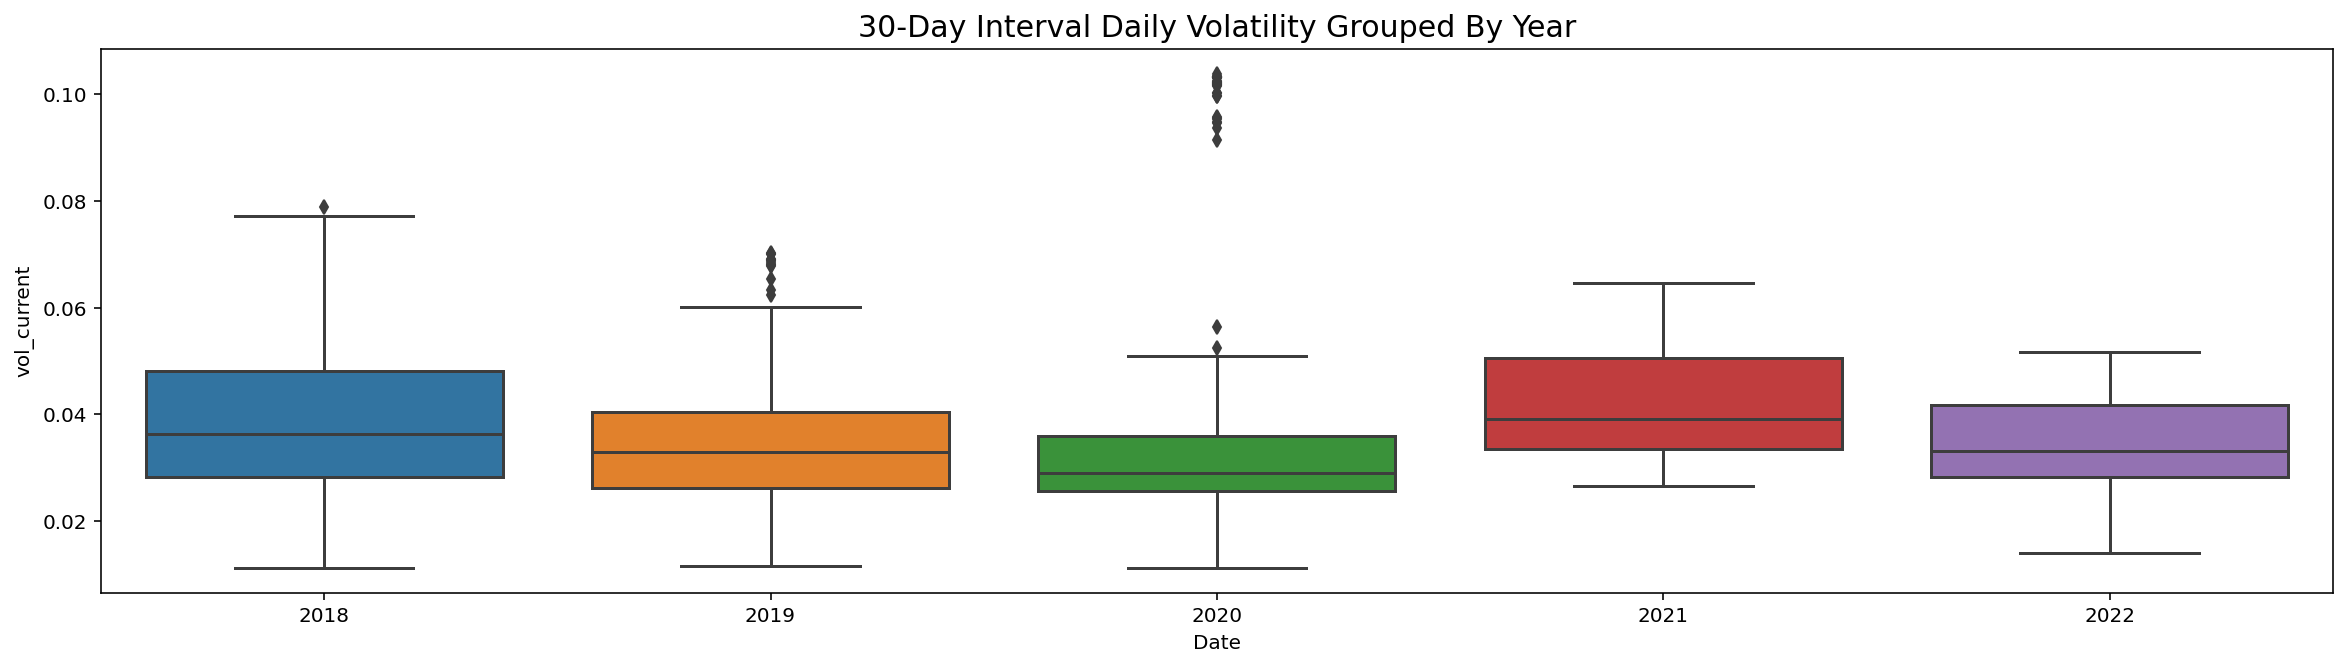

In [33]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=df.index.year, y=df.vol_current, ax=ax)
ax.set_title(f'{WINDOW_SIZE}-Day Interval Daily Volatility Grouped By Year', fontsize=15);

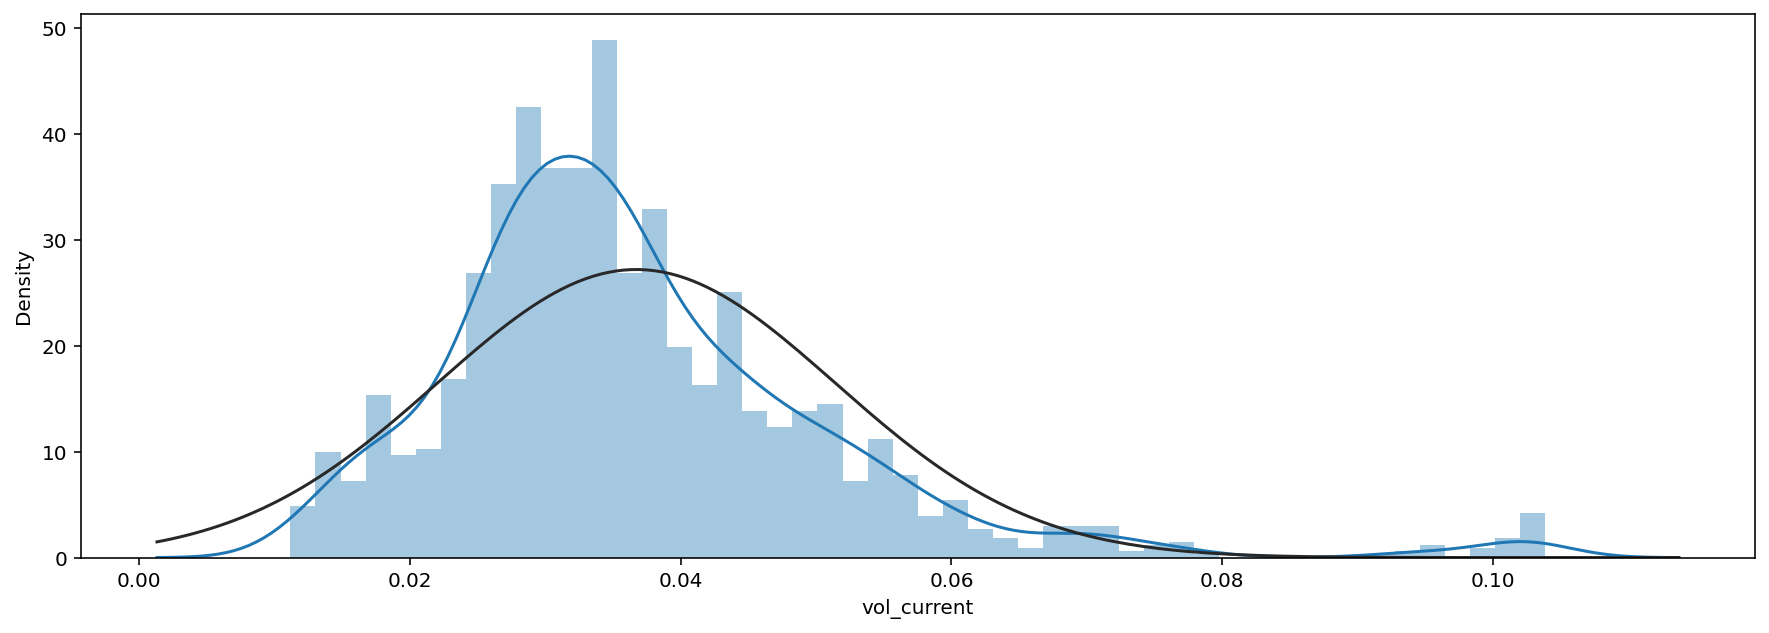

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df.vol_current, norm_hist=True, fit=stats.norm,
             bins=50, ax=ax)
plt.show();

The distribution of daily realized volatility is lightly right skewed, with a small number of larger values spreaded thinly on the right.

A skewed right distribution would have smaller median compared to mean, and mode smaller than median (mode < median < mean).

In [35]:
len(df)

1789

In [36]:
df.index

DatetimeIndex(['2018-01-31 00:00:00+00:00', '2018-02-01 00:00:00+00:00',
               '2018-02-02 00:00:00+00:00', '2018-02-03 00:00:00+00:00',
               '2018-02-04 00:00:00+00:00', '2018-02-05 00:00:00+00:00',
               '2018-02-06 00:00:00+00:00', '2018-02-07 00:00:00+00:00',
               '2018-02-08 00:00:00+00:00', '2018-02-09 00:00:00+00:00',
               ...
               '2022-12-15 00:00:00+00:00', '2022-12-16 00:00:00+00:00',
               '2022-12-17 00:00:00+00:00', '2022-12-18 00:00:00+00:00',
               '2022-12-19 00:00:00+00:00', '2022-12-20 00:00:00+00:00',
               '2022-12-21 00:00:00+00:00', '2022-12-22 00:00:00+00:00',
               '2022-12-23 00:00:00+00:00', '2022-12-24 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1789, freq=None)

In [37]:
100-1.7-20.5

77.8

**Train-Validation-Test Split**

In [38]:
test_size = 30
val_size = 365

split_time_1 = len(df) - (val_size + test_size)
split_time_2 = len(df) - test_size

train_idx = df.index[:split_time_1]
val_idx = df.index[split_time_1:split_time_2]
test_idx = df.index[split_time_2:]

In [39]:
print(f'Training \tFrom: {train_idx[0]} \tto {train_idx[-1]} \t{len(train_idx)} days')
print(f'Validation \tFrom: {val_idx[0]} \tto {val_idx[-1]} \t{len(val_idx)} days')
print(f'Test \t\tFrom: {test_idx[0]} \tto {test_idx[-1]} \t{len(test_idx)} days')

Training 	From: 2018-01-31 00:00:00+00:00 	to 2021-11-24 00:00:00+00:00 	1394 days
Validation 	From: 2021-11-25 00:00:00+00:00 	to 2022-11-24 00:00:00+00:00 	365 days
Test 		From: 2022-11-25 00:00:00+00:00 	to 2022-12-24 00:00:00+00:00 	30 days


In [40]:
# SPLIT FORWARD VOLATILITY INTO 3 PARTS 
# (this would be the target)
y_train = df.vol_future[train_idx]
y_val = df.vol_future[val_idx]
y_test = df.vol_future[test_idx]

In [41]:
# SPLIT CURRENT DAILY REALIZED VOLATILITY INTO 3 PARTS 
# (this would be the input for some models)
x_train = df.vol_current[train_idx]
x_val = df.vol_current[val_idx]
x_test = df.vol_current[test_idx]

In [42]:
# SPLIT RETURNS INTO 3 PARTS
# (this would be the input for GARCH models)
r_train = df.returns[train_idx]
r_val = df.returns[val_idx]
r_test = df.returns[test_idx]

In [43]:
# SPLIT LOG RETURNS INTO 3 PARTS
lr_train = df.log_returns[train_idx]
lr_val = df.log_returns[val_idx]
lr_test = df.log_returns[test_idx]

As I am going to build various types of models based on different algorithms with slightly different assumptions using different types of parameters, it's probably better to normalize the volatilities using MinMaxScaler to standardize performance comparison among different models.

In [44]:
scaler_vol = MinMaxScaler()

# FIT SCALER TO CURRENT REALIZED VOLATILITY IN TRAINING
scaler_vol = scaler_vol.fit(x_train.values.reshape(-1,1))

In [45]:
# TRANSFORM TRAINING VOLATILITIES 
x_train_scaled = pd.Series(scaler_vol.transform(x_train.values.reshape(-1,1))[:,0],
                           index=train_idx)
y_train_scaled = pd.Series(scaler_vol.transform(y_train.values.reshape(-1,1))[:,0],
                           index=train_idx)

# TRANSFORMING VALIDATION VOLATILITIES
x_val_scaled = pd.Series(scaler_vol.transform(x_val.values.reshape(-1,1))[:,0],
                           index=val_idx)
y_val_scaled = pd.Series(scaler_vol.transform(y_val.values.reshape(-1,1))[:,0],
                           index=val_idx)

# TRANSFORMING TEST VOLATILITIES
x_test_scaled = pd.Series(scaler_vol.transform(x_test.values.reshape(-1,1))[:,0],
                           index=test_idx)
y_test_scaled = pd.Series(scaler_vol.transform(y_test.values.reshape(-1,1))[:,0],
                           index=test_idx)

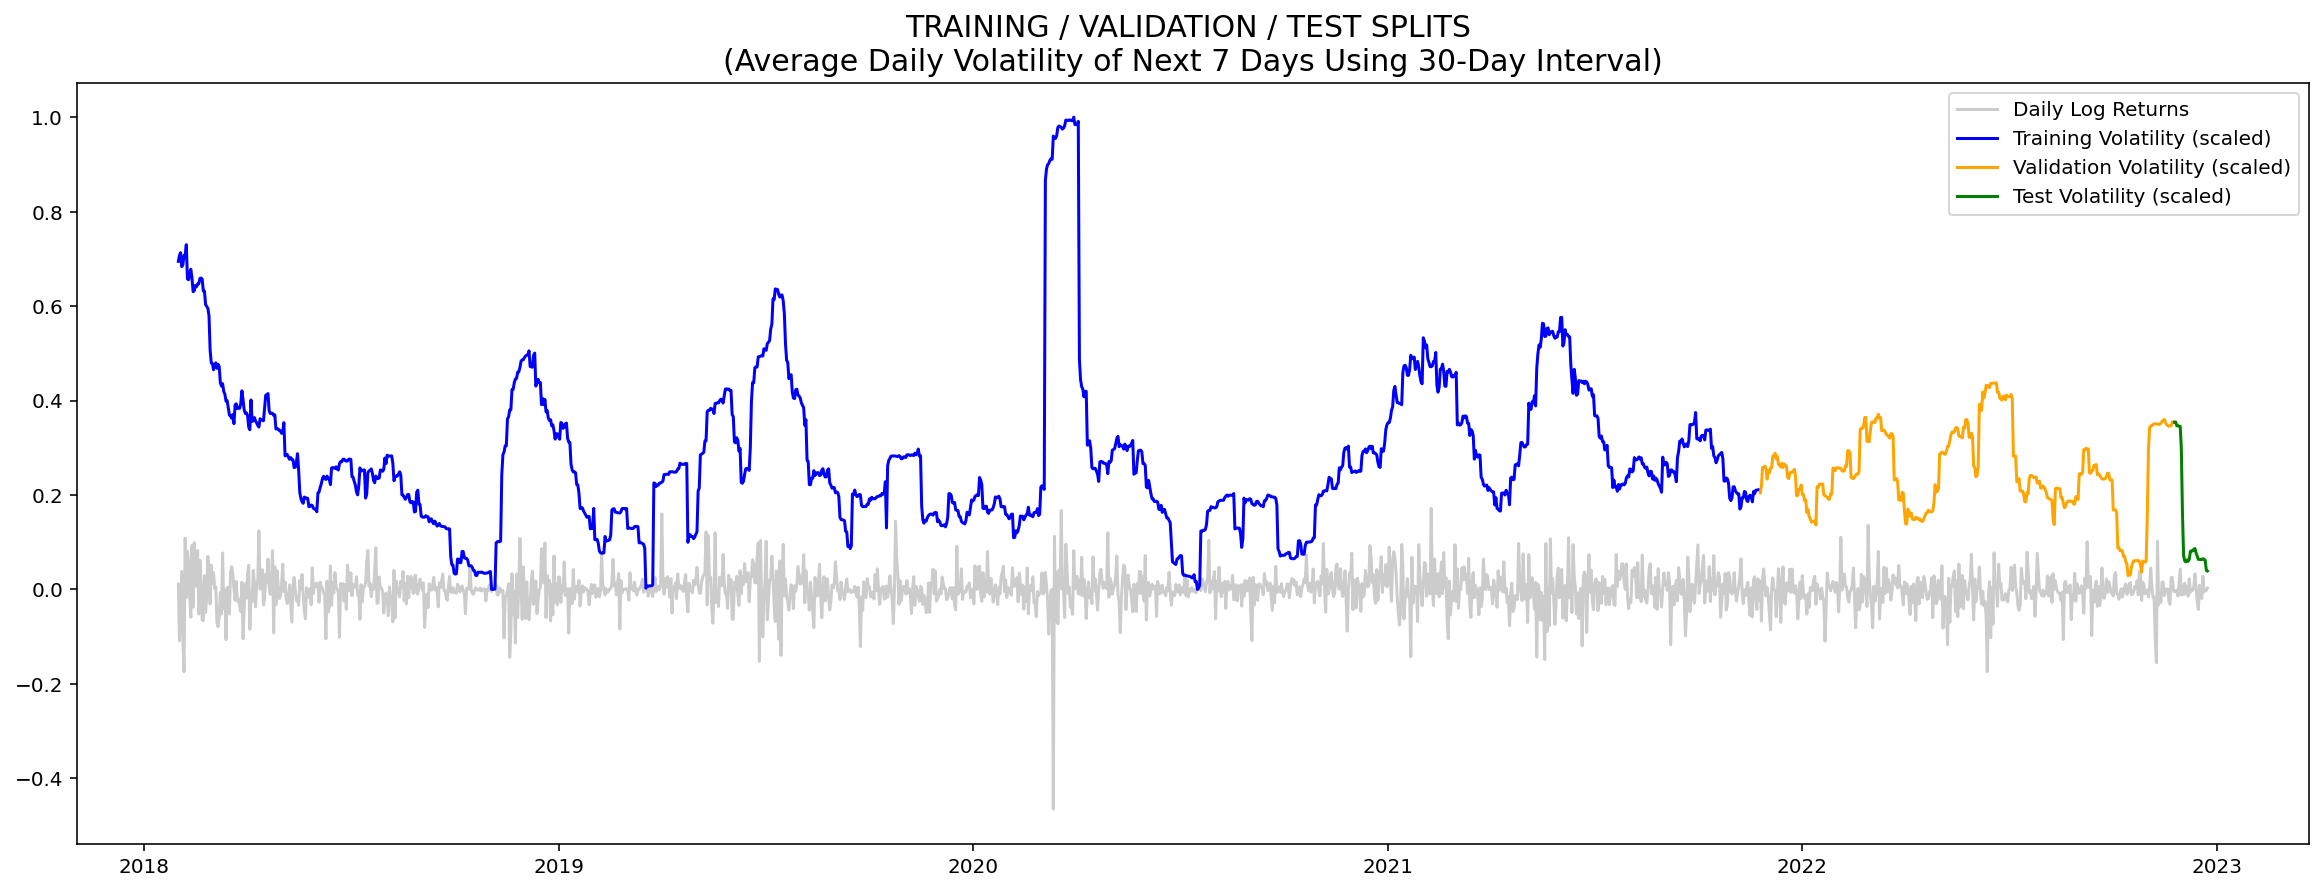

In [46]:
plt.figure(figsize=(20,7))

plt.plot(df.log_returns, color='gray', label='Daily Log Returns', alpha=0.4)

plt.plot(y_train_scaled, color='blue', label='Training Volatility (scaled)')
plt.plot(y_val_scaled, color='orange', label='Validation Volatility (scaled)')
plt.plot(y_test_scaled, color='green', label='Test Volatility (scaled)')

plt.plot()
plt.title(f'TRAINING / VALIDATION / TEST SPLITS \n(Average Daily Volatility of Next {n_future} Days Using {WINDOW_SIZE}-Day Interval)', fontsize=15)
plt.legend()
plt.show();

**Baseline Model**

In [47]:
# CALCULATE THE MEAN OF SCALED TRAINING DATA
mean_train_vol = x_train_scaled.mean()
mean_train_vol

0.2848416635580544

In [48]:
# CREATE SERIES OF PREDICTIONS FOR BASELINE MODEL ON VALIDATION SET
baseline_preds = np.ones(len(val_idx)) * mean_train_vol
baseline_preds = pd.Series(baseline_preds, index=lr_val.index)

In [49]:
# PLOTTING MODEL PREDICTIONS VS. TARGET VALUES
def viz_model(y_true, y_pred, model_name):
    plt.figure(figsize=(20,7))
    plt.plot(y_true, color='blue', 
             label=f"Scaled Next {n_future} days' Daily Volatility (Target)")
    plt.plot(x_val_scaled, color='gray',  ls='--',
             label=f"Scaled Current Daily Volatility")
    plt.plot(lr_val, color='gray', alpha=0.4,
             label='Daily Log Returns')
    plt.plot(y_pred, color='orange', lw=3,
             label=f'Forecasted Volatility')

    plt.title(f'{model_name} \non Validation Data', fontsize=15)
    plt.legend(loc='best');

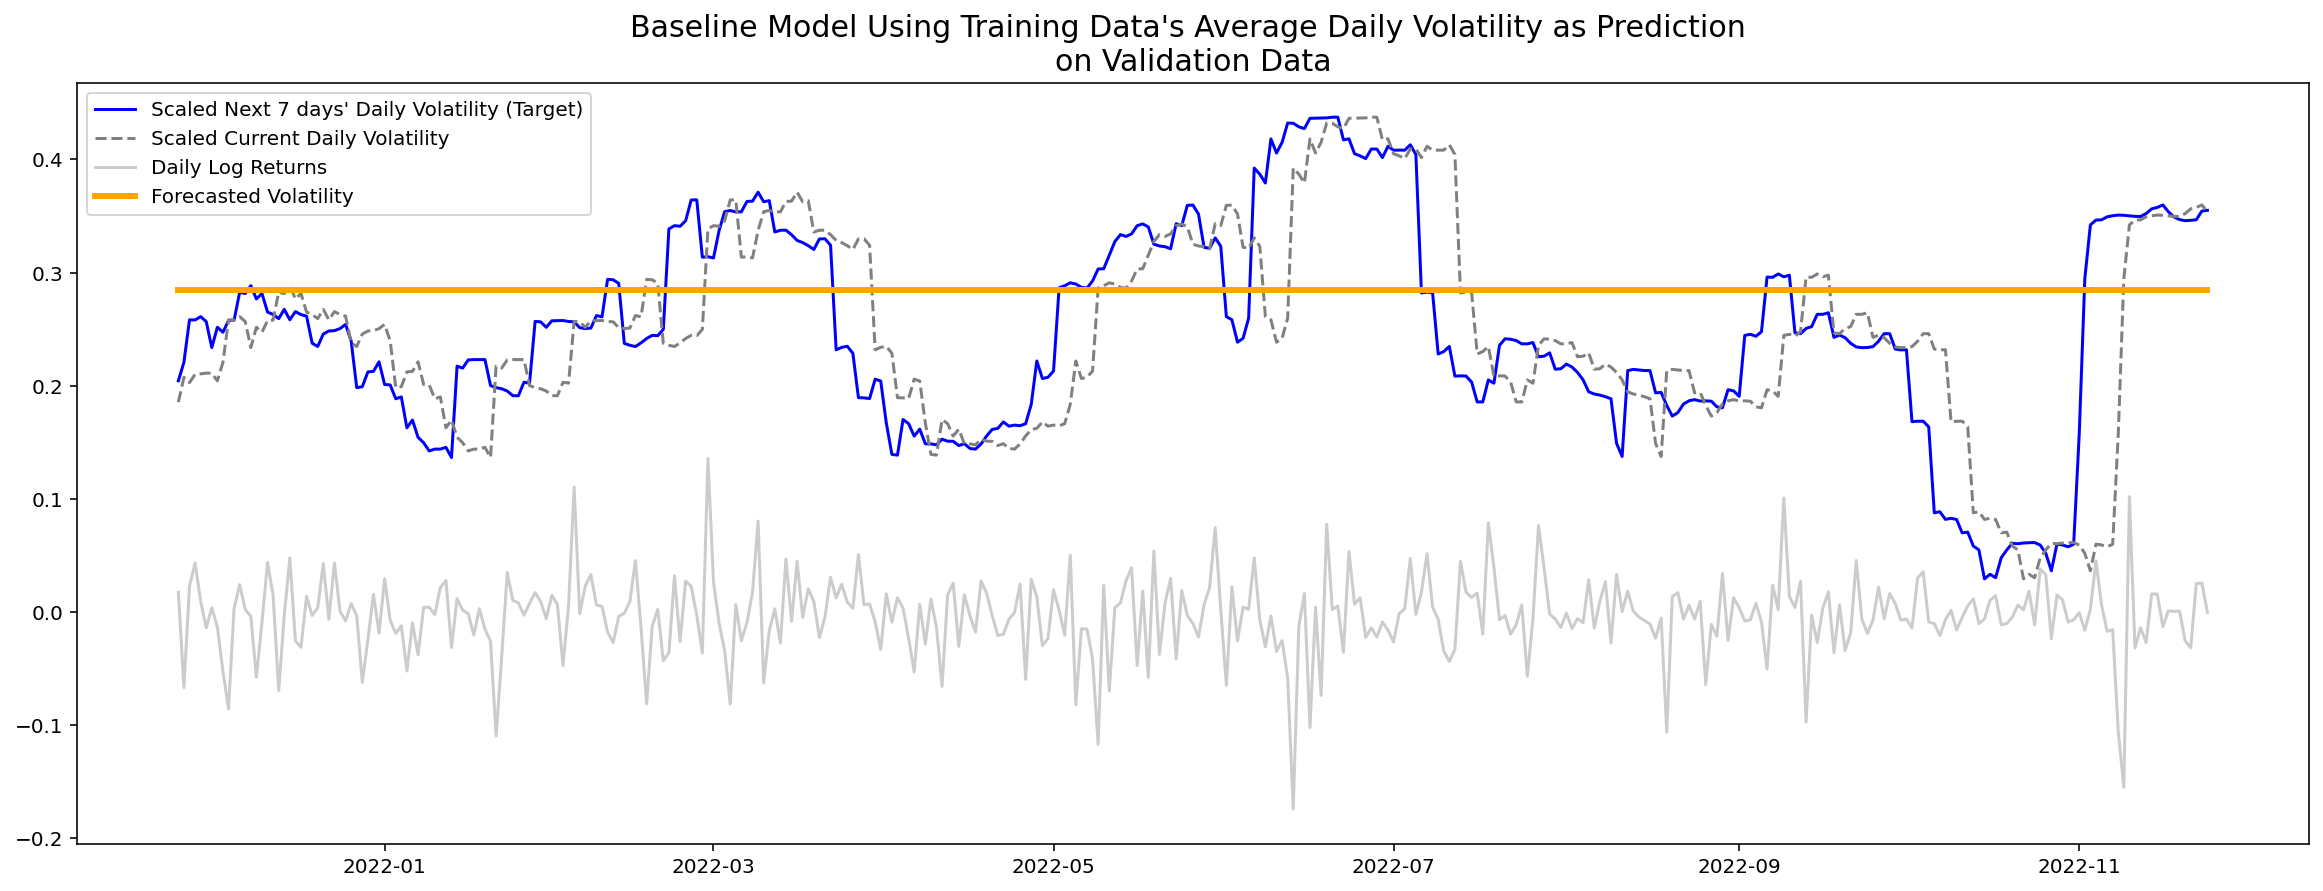

In [50]:
viz_model(y_val_scaled, baseline_preds, 
          f"Baseline Model Using Training Data's Average Daily Volatility as Prediction")

In [51]:
# DEFINE ROOT MEAN SQUARED PERCENTAGE ERROR FUNCTION
def RMSPE(y_true, y_pred):
    """
    Compute Root Mean Squared Percentage Error between 2 arrays
    """
    output = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))
    return output

In [52]:
# DEFINE ROOT MEAN SQUARED ERROR FUNCTION
def RMSE(y_true, y_pred):
    """
    Compute Root Mean Squared Error between 2 arrays
    """
    output = np.sqrt(mse(y_true, y_pred))
    return output

Metrics
The 2 main metrics I'd be using are RMSPE (Root Mean Squared Percentage Error) and RMSE (Root Mean Square Errors) with RMSPE prioritized. Scaling is very important in the calculation of volatility due to the level of freedom in frequency selection. Therefore I think RMSPE would help capture degree of errors compared to desired target values better than other metrics. Also RMSPE would punish large errors more than regular MAPE (Mean Absolute Percentage Error), which is what I want to do here.

RMSE and RMSPE would be tracked across different models' performance on validation set forecasting to indicate their abilities to generalize on out-of-sample data.

In [53]:
# INITIATE A DATAFRAME FOR MODEL PERFORMANCE TRACKING & COMPARISON 
perf_df = pd.DataFrame(columns=['Model', 'Validation RMSPE', 'Validation RMSE'])

In [54]:
# A FUNCTION THAT LOGS MODEL NAME, RMSE AND RMPSE INTO perf_df
# FOR EASY COMPARISON LATER
def log_perf(y_true, y_pred, model_name):
    perf_df.loc[len(perf_df.index)] = [model_name, 
                                       RMSPE(y_true, y_pred), 
                                       RMSE(y_true, y_pred)]
    return perf_df

In [55]:
log_perf(y_val_scaled, baseline_preds, 'Mean Baseline')

,Model,Validation RMSPE,Validation RMSE
0,Mean Baseline,1.263854,0.097878


**Naive Random Walk Forecasting**

A commonly known fact about volatility is that it tends to be autocorrelated. This property can be used to implement a naive model that just "predicts" future volatility by using whatever the daily volatility was at the immediate previous time step.

In this case, I'll use the daily volatility of the most recent 7 days as predictions for the next 7 days, which is essentially vol_current.

In [56]:
# USING THE PREVIOUS n_future DAY'S VOLATILITY
random_walk_preds = x_val_scaled

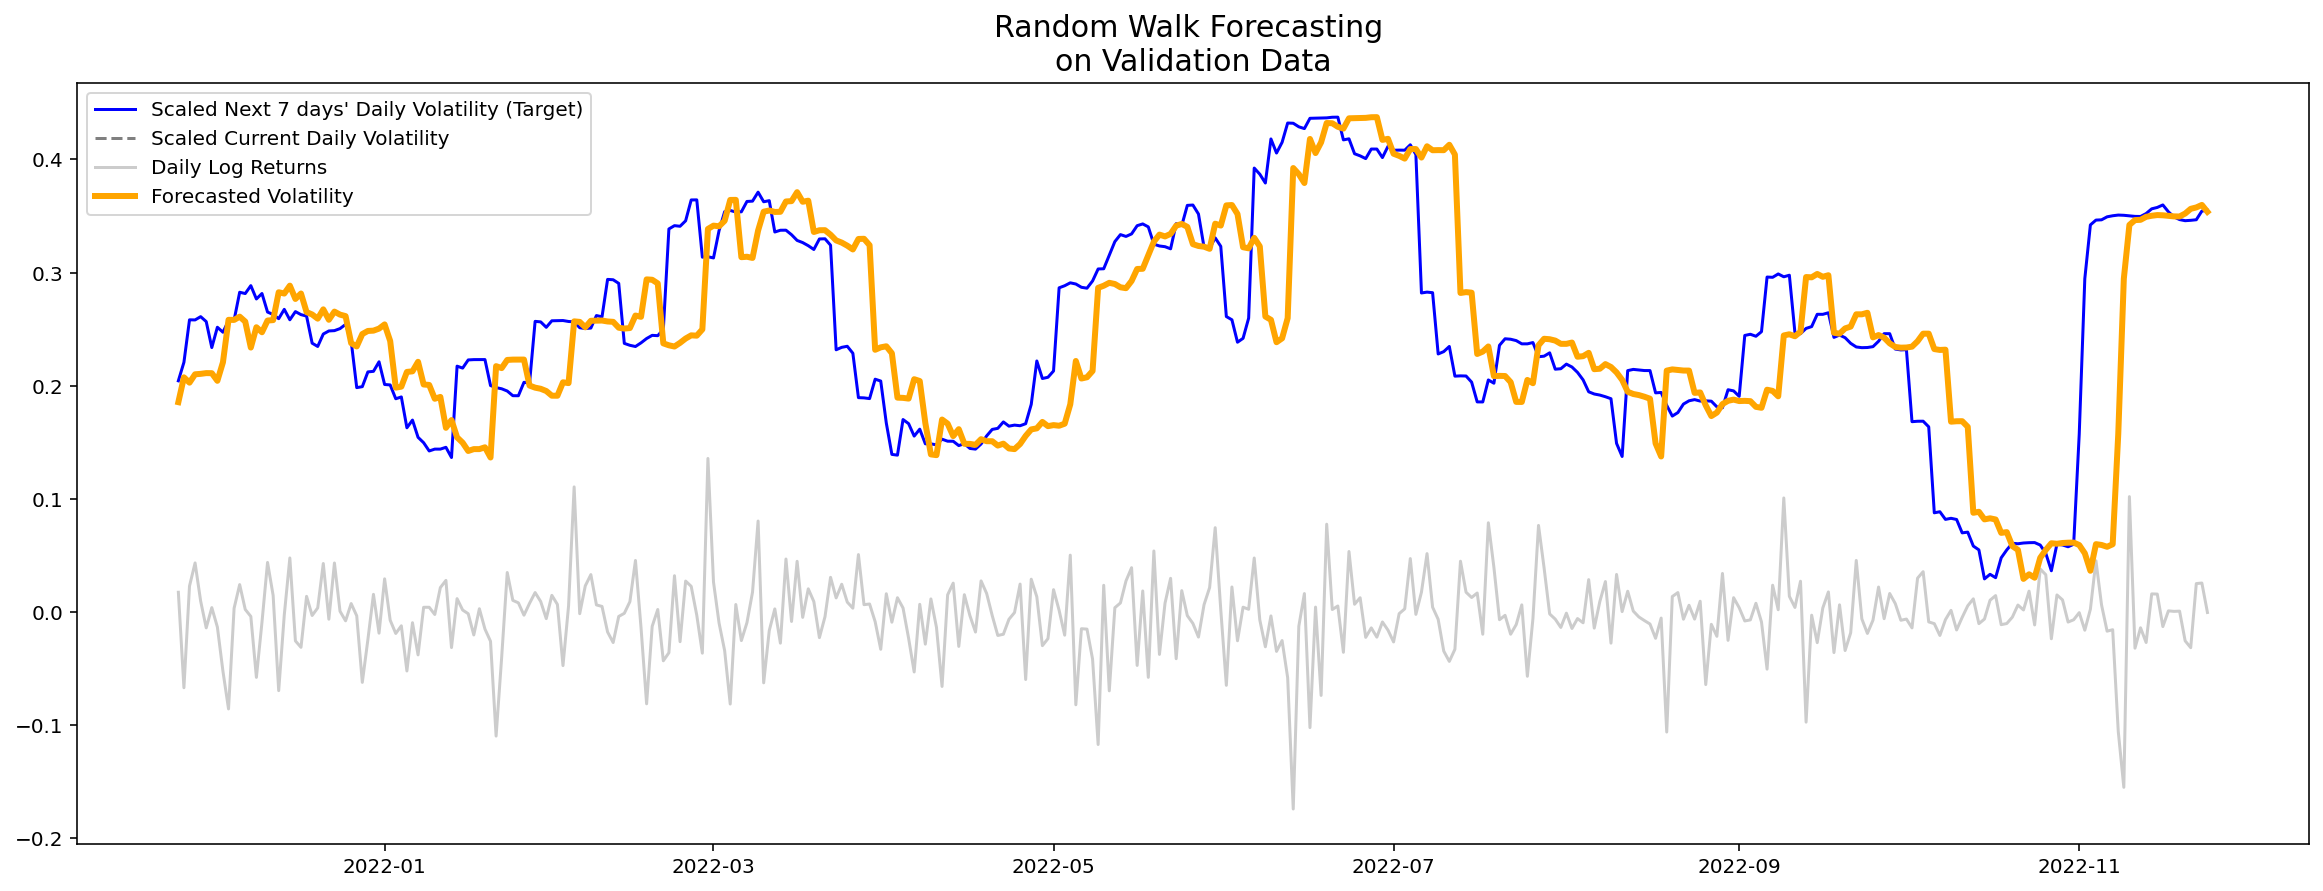

In [57]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, random_walk_preds, 'Random Walk Forecasting')

In [58]:
print('Validation RMSPE:', RMSPE(y_val_scaled, random_walk_preds))

Validation RMSPE: 0.35649039098281593


In [59]:
print('Validation RMSE:', RMSE(y_val_scaled, random_walk_preds))

Validation RMSE: 0.06629159781628885


In [60]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, random_walk_preds, 'Random Walk')

,Model,Validation RMSPE,Validation RMSE
0,Mean Baseline,1.263854,0.097878
1,Random Walk,0.356490,0.066292


**GARCH Model**

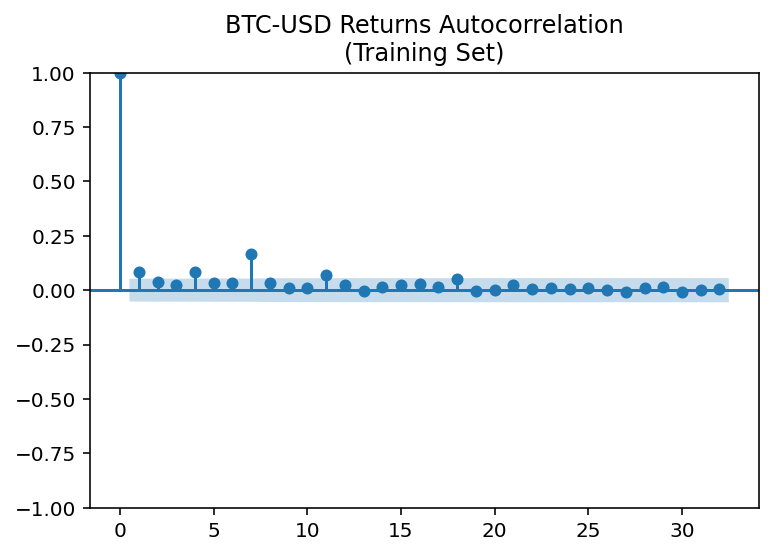

In [61]:
# VISUALIZE AUTOCORRELATION OF SQUARED RETURNS
plot_acf(r_train**2, 
          title=f'{tckr.upper()} Returns Autocorrelation\n(Training Set)');

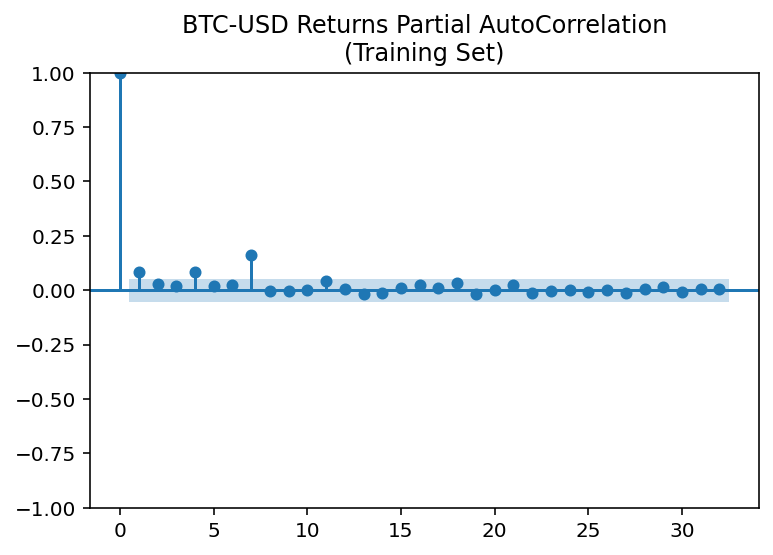

In [62]:
# VISUALIZE PARTIAL AUTOCORRELATION OF SQUARED RETURNS
plot_pacf(r_train**2, 
          title=f'{tckr.upper()} Returns Partial AutoCorrelation\n(Training Set)');

In [63]:
from arch import arch_model

In [64]:
gm_1 = arch_model(r_train, p=7, q=7,
                  dist='normal')
result_1 = gm_1.fit(disp='off')
print()
print(result_1.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3789.35
Distribution:                  Normal   AIC:                           7610.71
Method:            Maximum Likelihood   BIC:                           7694.55
                                        No. Observations:                 1394
Date:                Sat, Sep 23 2023   Df Residuals:                     1393
Time:                        16:16:15   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1780      0.110      1.618      0.106 [-3.7

Using a significant level of 0.05, none of the coefficients seems to be statistically significant. Therefore, I'll reduce the values of p and q to 1 to see if that helps.

In [65]:
gm_1 = arch_model(r_train, vol='GARCH', p=1, q=1,
                  dist='normal')
result_1 = gm_1.fit(disp='off')
print()
print(result_1.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3816.11
Distribution:                  Normal   AIC:                           7640.22
Method:            Maximum Likelihood   BIC:                           7661.18
                                        No. Observations:                 1394
Date:                Sat, Sep 23 2023   Df Residuals:                     1393
Time:                        16:16:16   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2243  9.347e-02      2.399  1.642e-02 [4.108e-

All coefficients look statistically significant now.

After being fitted to the training data (percent returns), the GARCH model outputs conditional volatility for the training portion of the time series. I am going to scale the fitted conditional volatility arrays, plot it out and compare it to the realized volatility calculated above (also scaled) x_train_scaled.

In [66]:
scaler_garch_vol = MinMaxScaler()

cond_vol_arr = result_1.conditional_volatility.values.reshape(-1,1)

# FITTING SCALER TO MODEL'S CONDITIONAL VOLATILITY
scaler_garch_vol = scaler_garch_vol.fit(cond_vol_arr)
scaled_cond_vol = pd.Series(scaler_garch_vol.transform(cond_vol_arr)[:,0],
                            index=train_idx)
     

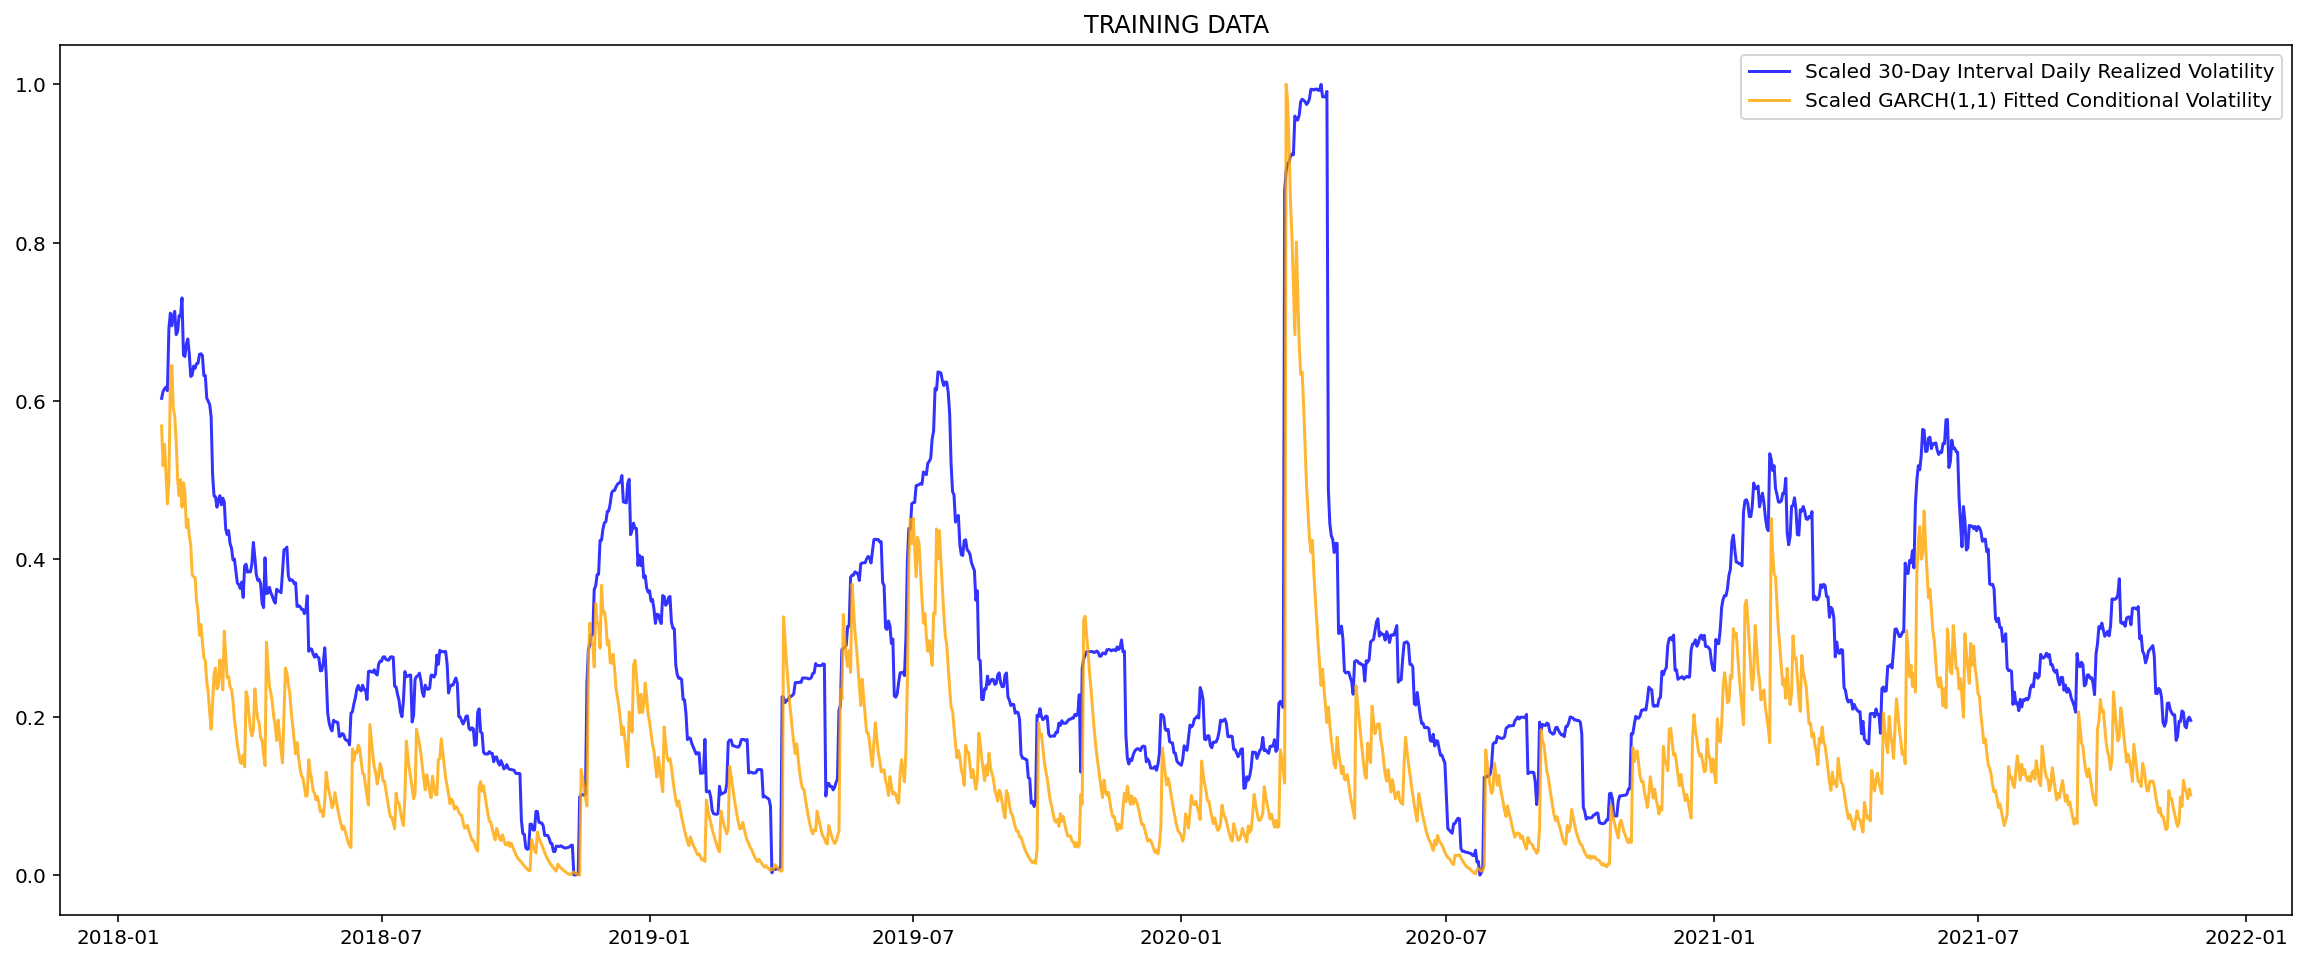

In [67]:
fig, ax = plt.subplots(figsize=(20,8))

ax.plot(x_train_scaled, color='blue', alpha=0.8,
        label=f'Scaled {WINDOW_SIZE}-Day Interval Daily Realized Volatility')
ax.plot(scaled_cond_vol, color='orange', alpha=0.8,
        label='Scaled GARCH(1,1) Fitted Conditional Volatility')
ax.set_title('TRAINING DATA')
plt.legend()
plt.show();

**Analytical-based Forecasting**

The volatility forecasts from the GARCH models using percent returns as input are on a totally different scale compared to the volatilities calculated from log returns. Therefore I am going to normalize the forecasted volatility based on the model's conditional_volatility output from the training data, and only comparing the scaled versions of volatilities on the Validation set.

In [68]:
# ROLLING FORECAST
# INITIALIZING rolling_forecast
rolling_forecasts = []
idx = df.index

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.returns[:idx]
    # from_idx = idx[split_time_1 + i - WINDOW_SIZE]
    # to_idx = idx[split_time_1 + i - 1]
    
    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, vol='GARCH', p=1, q=1,
                       dist='normal')
    model_fit = model.fit(disp='off')

    # OR FIXED ROLLING WINDOW FITTING
    # model_fit = model.fit(disp='off', first_obs=from_idx, last_obs=to_idx)

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=n_future, 
                             reindex=False).variance.values
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

gm_1_preds = pd.Series(rolling_forecasts, index=val_idx)

In [69]:
# TRANSFORM PREDICTIONS USING FITTED SCALER
gm_1_preds_scaled = pd.Series(scaler_garch_vol.transform(np.array(rolling_forecasts).reshape(-1,1))[:,0], 
                              index=val_idx)

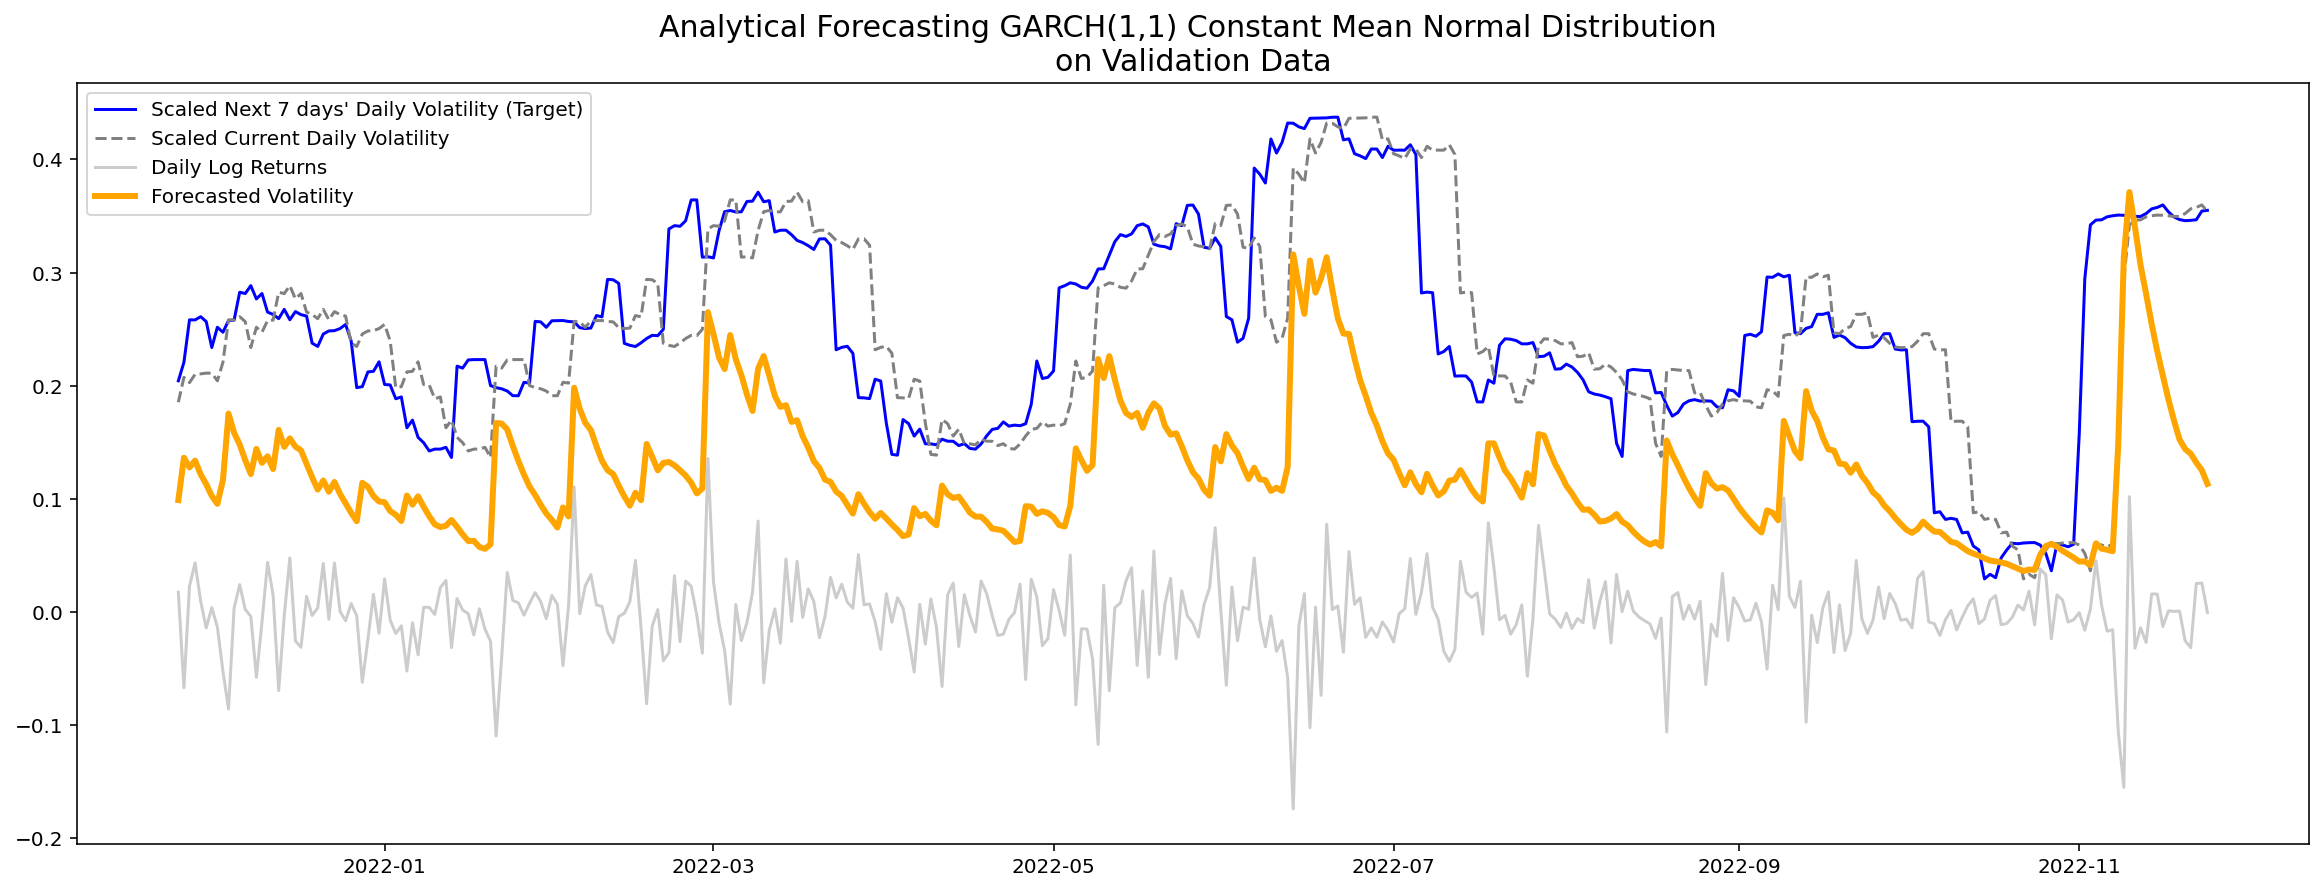

In [70]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, gm_1_preds_scaled, 
          'Analytical Forecasting GARCH(1,1) Constant Mean Normal Distribution')

In [71]:
print('Validation RMSPE:', RMSPE(y_val_scaled, gm_1_preds_scaled))

Validation RMSPE: 0.5142012969042916


In [72]:
print('Validation RMSE:', RMSE(y_val_scaled, gm_1_preds_scaled))

Validation RMSE: 0.14265699675775112


In [73]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, gm_1_preds_scaled, 'GARCH(1,1) | Constant Mean | Normal Dist')

,Model,Validation RMSPE,Validation RMSE
0,Mean Baseline,1.263854,0.097878
1,Random Walk,0.356490,0.066292
2,"GARCH(1,1) | Constant Mean | Normal Dist",0.514201,0.142657


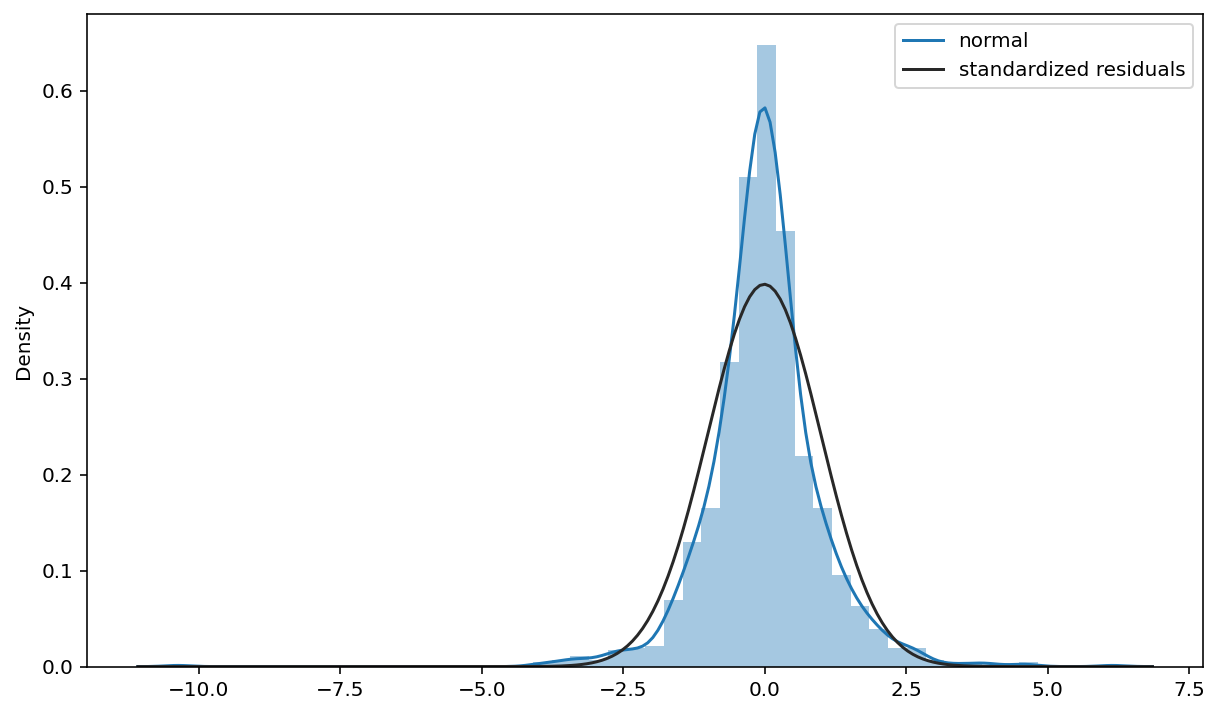

In [74]:
# INSPECTING THE RESIDUALS
gm_resid = result_1.resid
gm_std = result_1.conditional_volatility

# STANDARDIZING RESIDUALS
gm_std_resid = gm_resid / gm_std

# VISUALIZING STANDARDIZED RESIDUALS VS. A NORMAL DISTRIBUTION
plt.figure(figsize=(10,6))
sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50)
plt.legend(('normal', 'standardized residuals'))
plt.show();

"GARCH models make distribution assumptions about the residuals and the mean return. Financial time series data often does not follow a normal distribution. In financial time series it is much more likely to observe extreme positive and negative values that are far away from the mean. to improve a GARCH models distribution assumptions to be more representative of real financial data we can specify the models distribution assumption to be a Student's t-distribution. 

**Neural Networks**

In [75]:
import tensorflow as tf

2023-09-23 16:16:47.493323: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [76]:
# CONVERT AN SERIES TO MATRIX DATASET
def windowed_dataset(x_series, y_series, lookback_window):
    dataX, dataY = [], []
    for i in range((lookback_window-1), len(x_series)):
        from_idx = x_series.index[i-lookback_window+1]
        to_idx = x_series.index[i]
        a = x_series[from_idx:to_idx].values
        dataX.append(a)
        dataY.append(y_series[to_idx])

    return np.array(dataX), np.array(dataY)

In [77]:
from keras import backend as K

In [78]:
def rmspe(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays
    that can be used as metrics for NN during training
    '''
    loss = K.sqrt(K.mean(K.square((y_true - y_pred) / y_true)))

    return loss

In [79]:
def val_forecast(model):
    forecast = []
    idx = df.index

    # ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
    for i in range(len(val_idx)):
        # GET THE DATA AT THE PREVIOUS n_past TIME STEPS
        # (including current value)
        from_idx = idx[split_time_1 + i - n_past + 1]
        to_idx = idx[split_time_1 + i]
        pred = model.predict(df.vol_current[from_idx:to_idx].values[np.newaxis])
        forecast.append(pred)

    forecast = np.array(forecast)[:, 0, 0]
    preds = pd.Series(forecast, index=val_idx)

    preds_scaled = pd.Series(scaler_vol.transform(preds.values.reshape(-1,1))[:,0],
                                index=val_idx)
    return preds_scaled

In [80]:
def viz_train_val_metrics(model_hist):
    fig, ax = plt.subplots(figsize=(20,8))

    # PLOT MSE - LEFT Y-AXIS
    # TRAINING
    ln11 = ax.plot(range(len(model_hist.history['loss'])), 
                model_hist.history['loss'], color='lightblue',
                label='Training MSE')
    # VALIDATION
    ln12 = ax.plot(range(len(model_hist.history['loss'])), 
                model_hist.history['val_loss'], color='darkblue',
                label='Validation MSE')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('MSE')

    # PLOT RMSE - RIGHT Y-AXIS
    ax2 = ax.twinx()
    ln21 = ax2.plot(range(len(model_hist.history['loss'])), 
                model_hist.history['rmspe'], color='pink',
                label='Training RMSPE')
    ln22 = ax2.plot(range(len(model_hist.history['loss'])), 
                model_hist.history['val_rmspe'], color='red',
                label='Validation RMSPE')
    ax2.set_ylabel('RMSPE')

    # COMBINING LALBELS FOR 4 LINES INTO 1 LEGEND
    lns = ln11 + ln12 + ln21 + ln22
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='best')

    ax.set_title('Training vs. Validation Metrics', fontsize=15)
    plt.show();
     

**Neural Network Baseline Metrics - Fully Connected Network**

In [81]:
# CLEARING ANY INTERNAL VARIABLES TO PREVENT MODELS
# FROM IMPACTING LATER VERSIONS OF THEMSELVES
tf.keras.backend.clear_session()

n_past = 14
batch_size = 64

mat_X_train, mat_y_train = windowed_dataset(x_train, y_train, n_past)
mat_X_val, mat_y_val = windowed_dataset(x_val, y_val, n_past)

snn_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[n_past, 1]),                          
    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(1)
])

snn_1.compile(loss='mse', 
              optimizer='adam', 
              metrics=[rmspe])

print(snn_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14)                0         
                                                                 
 dense (Dense)               (None, 1)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [82]:
# FIT MODEL TO TRAINING DATASET
snn_1_res = snn_1.fit(mat_X_train, mat_y_train, epochs=100, verbose=1,
                      validation_data=(mat_X_val, mat_y_val),
                      batch_size=batch_size, shuffle=True)
     


Epoch 1/100
22/22 [==============================] - 1s 16ms/step - loss: 0.0304 - rmspe: 4.5485 - val_loss: 0.0176 - val_rmspe: 3.8281
Epoch 2/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0205 - rmspe: 3.5822 - val_loss: 0.0107 - val_rmspe: 2.9040
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0134 - rmspe: 2.7200 - val_loss: 0.0060 - val_rmspe: 2.1016
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0085 - rmspe: 2.0452 - val_loss: 0.0032 - val_rmspe: 1.4875
Epoch 5/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0055 - rmspe: 1.5658 - val_loss: 0.0016 - val_rmspe: 1.0653
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0037 - rmspe: 1.2950 - val_loss: 8.7163e-04 - val_rmspe: 0.8396
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0027 - rmspe: 1.2013 - val_loss: 5.5317e-04 - val_rmspe: 0.7783
Epoch 8/100
22/22 [===========================

Epoch 59/100
22/22 [==============================] - 0s 3ms/step - loss: 1.9696e-04 - rmspe: 0.4909 - val_loss: 7.3810e-05 - val_rmspe: 0.3682
Epoch 60/100
22/22 [==============================] - 0s 5ms/step - loss: 1.8828e-04 - rmspe: 0.4775 - val_loss: 7.1242e-05 - val_rmspe: 0.3605
Epoch 61/100
22/22 [==============================] - 0s 4ms/step - loss: 1.7986e-04 - rmspe: 0.4613 - val_loss: 6.7896e-05 - val_rmspe: 0.3498
Epoch 62/100
22/22 [==============================] - 0s 6ms/step - loss: 1.7233e-04 - rmspe: 0.4482 - val_loss: 6.5080e-05 - val_rmspe: 0.3403
Epoch 63/100
22/22 [==============================] - 0s 3ms/step - loss: 1.6546e-04 - rmspe: 0.4391 - val_loss: 6.3326e-05 - val_rmspe: 0.3344
Epoch 64/100
22/22 [==============================] - 0s 5ms/step - loss: 1.5886e-04 - rmspe: 0.4342 - val_loss: 6.3516e-05 - val_rmspe: 0.3352
Epoch 65/100
22/22 [==============================] - 0s 7ms/step - loss: 1.5282e-04 - rmspe: 0.4219 - val_loss: 5.9870e-05 - val_rmspe:

In [83]:
snn_1_preds_scaled = val_forecast(snn_1)

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 22ms/step


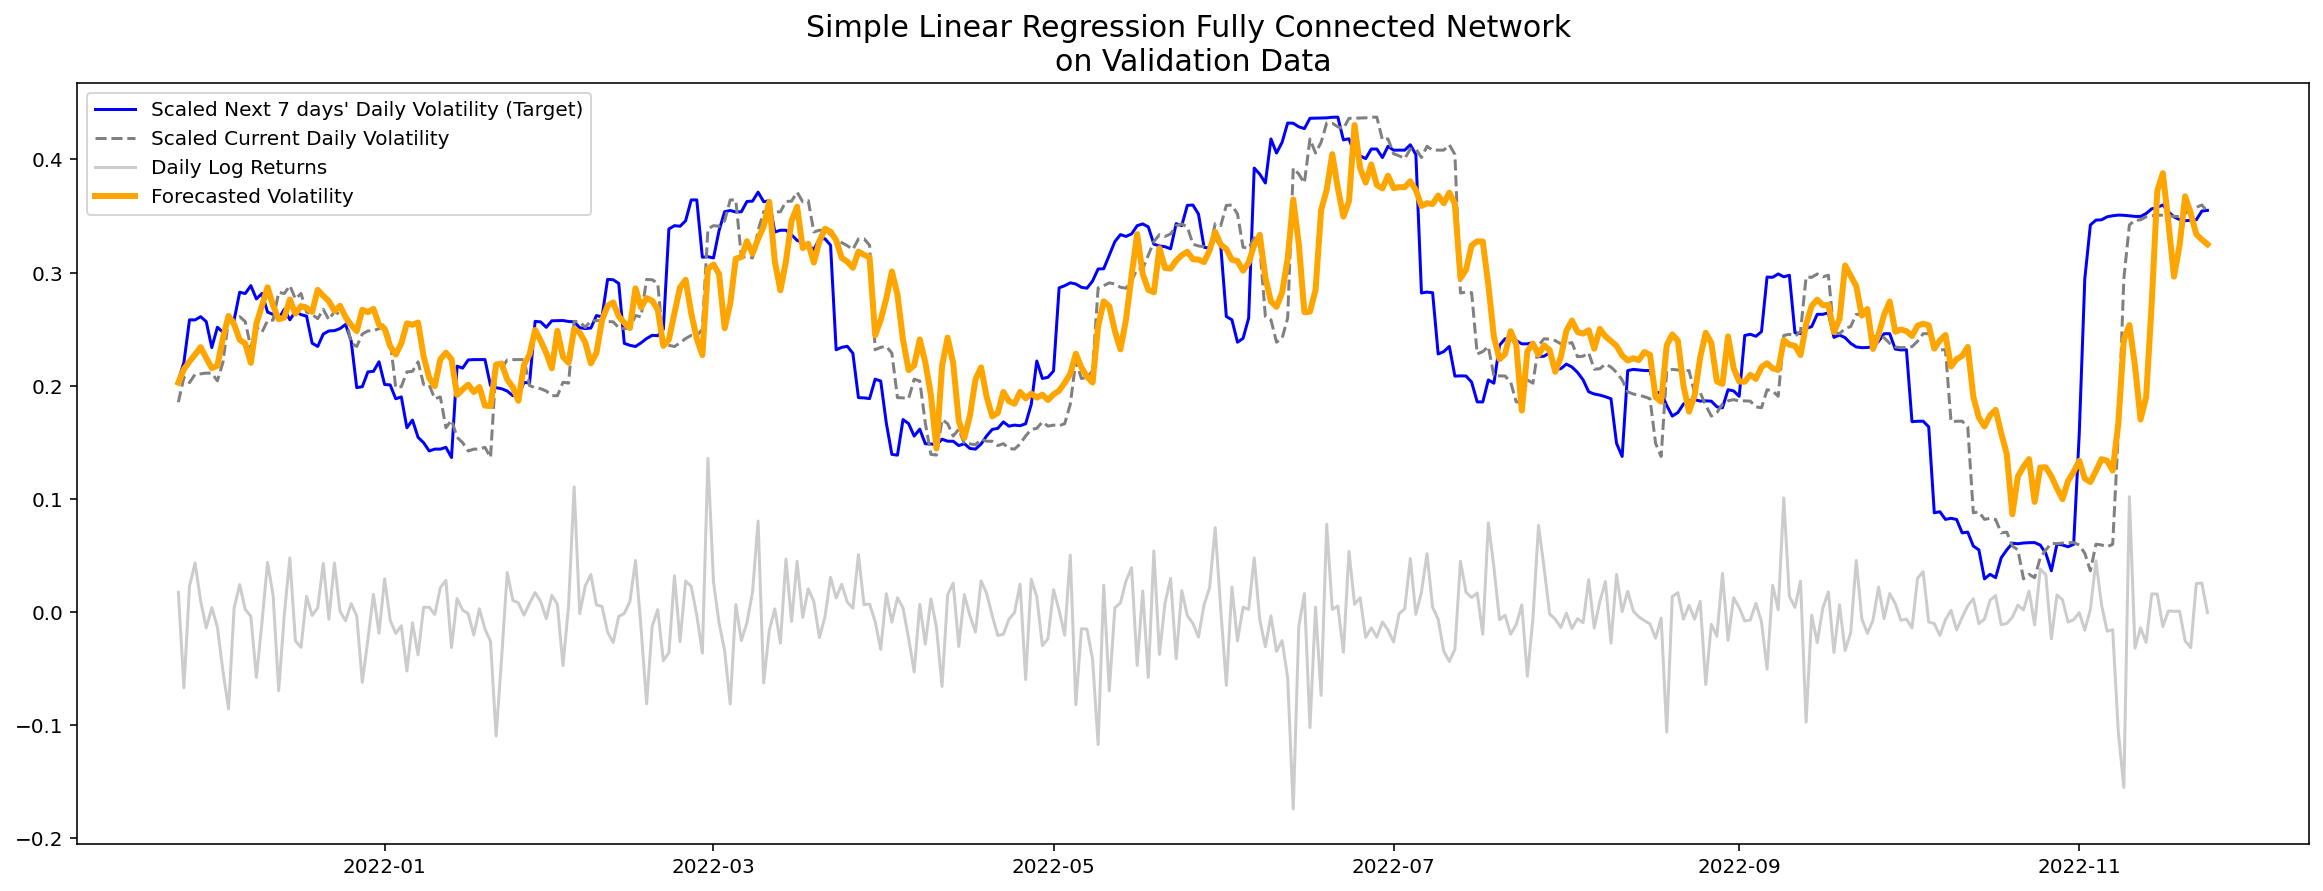

In [84]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, snn_1_preds_scaled, 
          "Simple Linear Regression Fully Connected Network")
     

In [85]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, snn_1_preds_scaled,
         f"Simple LR Fully Connected NN | n_past={n_past}")

,Model,Validation RMSPE,Validation RMSE
0,Mean Baseline,1.263854,0.097878
1,Random Walk,0.356490,0.066292
2,"GARCH(1,1) | Constant Mean | Normal Dist",0.514201,0.142657
3,Simple LR Fully Connected NN | n_past=14,0.634977,0.069790


**Long Short-Term Memory (LSTM)**

In [86]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from decimal import Decimal

In [87]:
tf.keras.backend.clear_session()

n_past = 14
batch_size = 64

mat_X_train, mat_y_train = windowed_dataset(x_train, y_train, n_past)
mat_X_val, mat_y_val = windowed_dataset(x_val, y_val, n_past)

lstm_1 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), 
                           input_shape=[None]),                            
    # ADDING 1 LSTM LAYER
    tf.keras.layers.LSTM(20),
    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(1)
])

lstm_1.compile(loss='mse', 
               optimizer="adam", 
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_1.h5',
                                save_best_only=True,
                                monitor='loss')

# STOPPING THE TRAINING IF VALIDATION RMSPE IS NOT IMPROVING 
early_stopping_cb = EarlyStopping(patience=20,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

lstm_1_res = lstm_1.fit(mat_X_train, mat_y_train, epochs=200,
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_data=(mat_X_val, mat_y_val),
                        verbose=1, batch_size=batch_size, shuffle=True)

Epoch 1/200
22/22 [==============================] - 3s 30ms/step - loss: 6.2998e-04 - rmspe: 0.7485 - val_loss: 1.2279e-04 - val_rmspe: 0.4852
Epoch 2/200
22/22 [==============================] - 0s 11ms/step - loss: 2.2904e-04 - rmspe: 0.4290 - val_loss: 8.7432e-05 - val_rmspe: 0.4047
Epoch 3/200
22/22 [==============================] - 0s 11ms/step - loss: 1.8845e-04 - rmspe: 0.4586 - val_loss: 6.1435e-05 - val_rmspe: 0.3088
Epoch 4/200
22/22 [==============================] - 0s 10ms/step - loss: 1.5692e-04 - rmspe: 0.4097 - val_loss: 5.5206e-05 - val_rmspe: 0.2794
Epoch 5/200
22/22 [==============================] - 0s 10ms/step - loss: 1.3396e-04 - rmspe: 0.3514 - val_loss: 5.3121e-05 - val_rmspe: 0.2438
Epoch 6/200
22/22 [==============================] - 0s 14ms/step - loss: 1.1253e-04 - rmspe: 0.3117 - val_loss: 5.1070e-05 - val_rmspe: 0.2599
Epoch 7/200
22/22 [==============================] - 0s 10ms/step - loss: 1.0301e-04 - rmspe: 0.2809 - val_loss: 5.5967e-05 - val_rmspe:

Epoch 58/200
22/22 [==============================] - 0s 8ms/step - loss: 6.5606e-05 - rmspe: 0.2193 - val_loss: 3.5731e-05 - val_rmspe: 0.1893
Epoch 59/200
22/22 [==============================] - 0s 9ms/step - loss: 6.4734e-05 - rmspe: 0.2214 - val_loss: 3.7886e-05 - val_rmspe: 0.2032
Epoch 60/200
22/22 [==============================] - 0s 9ms/step - loss: 6.4648e-05 - rmspe: 0.2209 - val_loss: 3.7053e-05 - val_rmspe: 0.1804
Epoch 61/200
22/22 [==============================] - 0s 8ms/step - loss: 6.4893e-05 - rmspe: 0.2209 - val_loss: 3.5887e-05 - val_rmspe: 0.1915
Epoch 62/200
22/22 [==============================] - 0s 8ms/step - loss: 6.5063e-05 - rmspe: 0.2230 - val_loss: 3.5764e-05 - val_rmspe: 0.1840
Epoch 63/200
22/22 [==============================] - 0s 11ms/step - loss: 6.4854e-05 - rmspe: 0.2204 - val_loss: 3.7867e-05 - val_rmspe: 0.2027
Epoch 64/200
22/22 [==============================] - 0s 12ms/step - loss: 6.4340e-05 - rmspe: 0.2164 - val_loss: 3.6758e-05 - val_rmsp

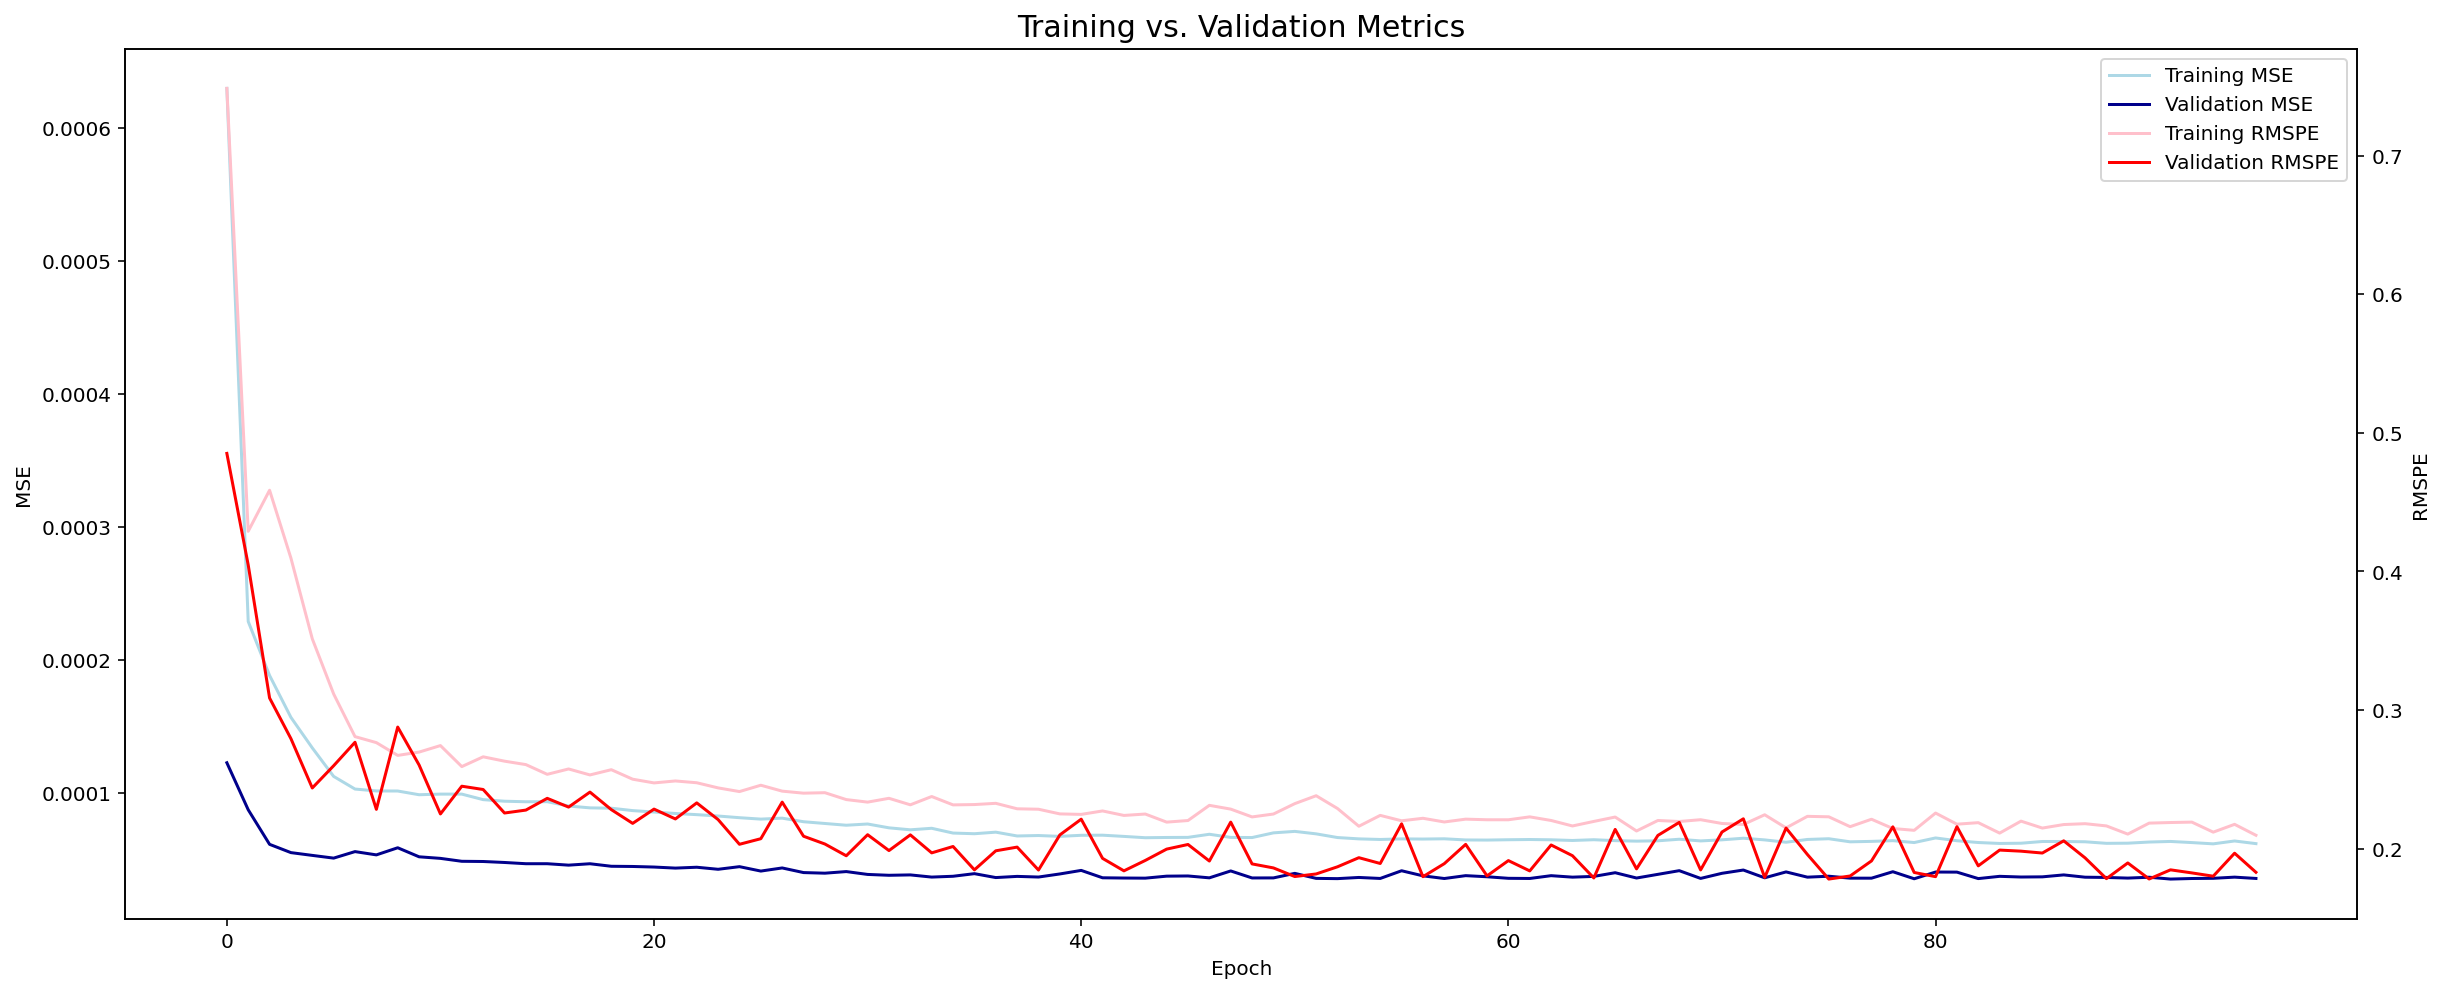

In [88]:
viz_train_val_metrics(lstm_1_res)

Although both lines look pretty unstable, overall there's a downward trend.

In [89]:
lstm_1_preds_scaled = val_forecast(lstm_1)

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 37ms/step


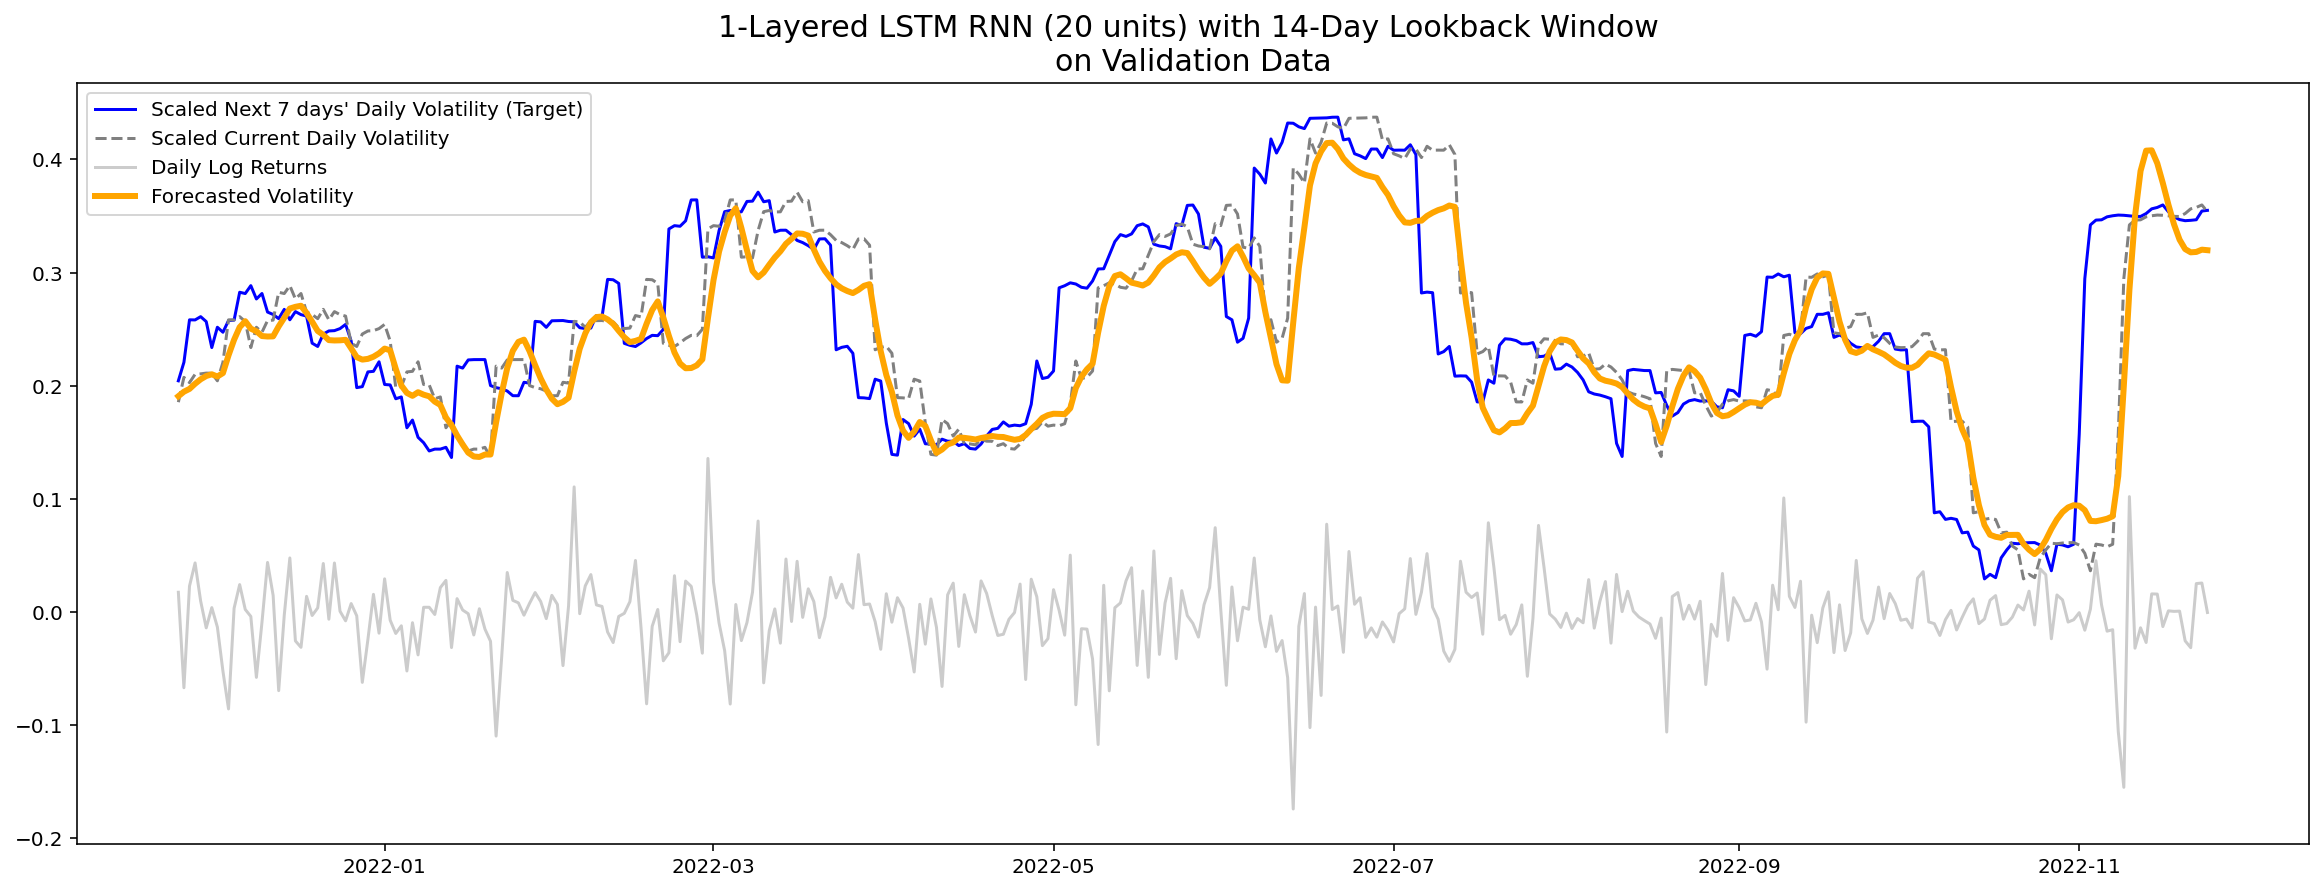

In [90]:
# PLOTTING PREDICTIONS VS. TARGET VALUES ON VALIDATION SET
viz_model(y_val_scaled, lstm_1_preds_scaled, 
          f"1-Layered LSTM RNN (20 units) with {n_past}-Day Lookback Window")

In [91]:
# APPEND METRICS OUTPUTS TO perf_df DATAFRAME
log_perf(y_val_scaled, lstm_1_preds_scaled, 
         f"LSTM 1 layer 20 units | n_past={n_past}")

,Model,Validation RMSPE,Validation RMSE
0,Mean Baseline,1.263854,0.097878
1,Random Walk,0.356490,0.066292
2,"GARCH(1,1) | Constant Mean | Normal Dist",0.514201,0.142657
3,Simple LR Fully Connected NN | n_past=14,0.634977,0.069790
4,LSTM 1 layer 20 units | n_past=14,0.333818,0.065253
